### 1.1- Data exploration :



In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as kl 
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

**Reading The data and applying some methods to explore it**

In [2]:
dfPhase = pd.read_csv("C:/Users/kasia/Downloads/project2/Phase1.csv")

In [3]:
dfPhase.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,1,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,3,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,4,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,12,0,tcp,http,SF,287,2251,0,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal


In [6]:
dfPhase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   13599 non-null  int64  
 1   duration                     13599 non-null  int64  
 2   protocol_type                13599 non-null  object 
 3   service                      13599 non-null  object 
 4   flag                         13599 non-null  object 
 5   src_bytes                    13599 non-null  int64  
 6   dst_bytes                    13599 non-null  int64  
 7   land                         13599 non-null  int64  
 8   wrong_fragment               13599 non-null  int64  
 9   urgent                       13599 non-null  int64  
 10  hot                          13599 non-null  int64  
 11  num_failed_logins            13599 non-null  int64  
 12  logged_in                    13599 non-null  int64  
 13  num_compromised 

In [7]:
dfPhase.describe(include='all')

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,13599.000000,13599.000000,13599,13599,13599,1.359900e+04,1.359900e+04,13599.000000,13599.000000,13599.0,...,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599
unique,NaN,NaN,3,51,10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,NaN,10807,7566,12693,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13449
mean,12495.645636,182.747776,NaN,NaN,NaN,1.164666e+04,4.352227e+03,0.000074,0.001177,0.0,...,187.626664,0.803486,0.041635,0.121749,0.025695,0.021073,0.013594,0.046417,0.044595,NaN
std,7333.313621,1371.063164,NaN,NaN,NaN,1.723699e+05,6.941981e+04,0.008575,0.058150,0.0,...,94.248057,0.331422,0.130418,0.255221,0.068712,0.122787,0.101307,0.195325,0.191117,NaN
min,0.000000,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,6113.500000,0.000000,NaN,NaN,NaN,1.050000e+02,8.100000e+01,0.000000,0.000000,0.0,...,110.000000,0.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,12521.000000,0.000000,NaN,NaN,NaN,2.320000e+02,3.700000e+02,0.000000,0.000000,0.0,...,255.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,18848.000000,0.000000,NaN,NaN,NaN,3.240000e+02,2.009000e+03,0.000000,0.000000,0.0,...,255.000000,1.000000,0.020000,0.080000,0.030000,0.000000,0.000000,0.000000,0.000000,NaN


In [8]:
dfPhase['class'].value_counts()

class
normal     13449
anomaly      150
Name: count, dtype: int64

**We can see that the unbalnce is much more bigger than the norms to build a decent model, still we will try to do our best to improve the F1 score**

### 1.2- Data preprocessing :

In [9]:
# remove the rows with missing values

kl.missingval_plot(dfPhase,figsize=(6,5))

No missing values found in the dataset.


In [10]:
# remove the duplicated rows, we will ingore id column

print(dfPhase.shape)

dfPhase.drop_duplicates(subset=dfPhase.columns[1:],inplace=True)

print(dfPhase.shape)

(13599, 43)
(13599, 43)


**Even better, no duplicates in the data**

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


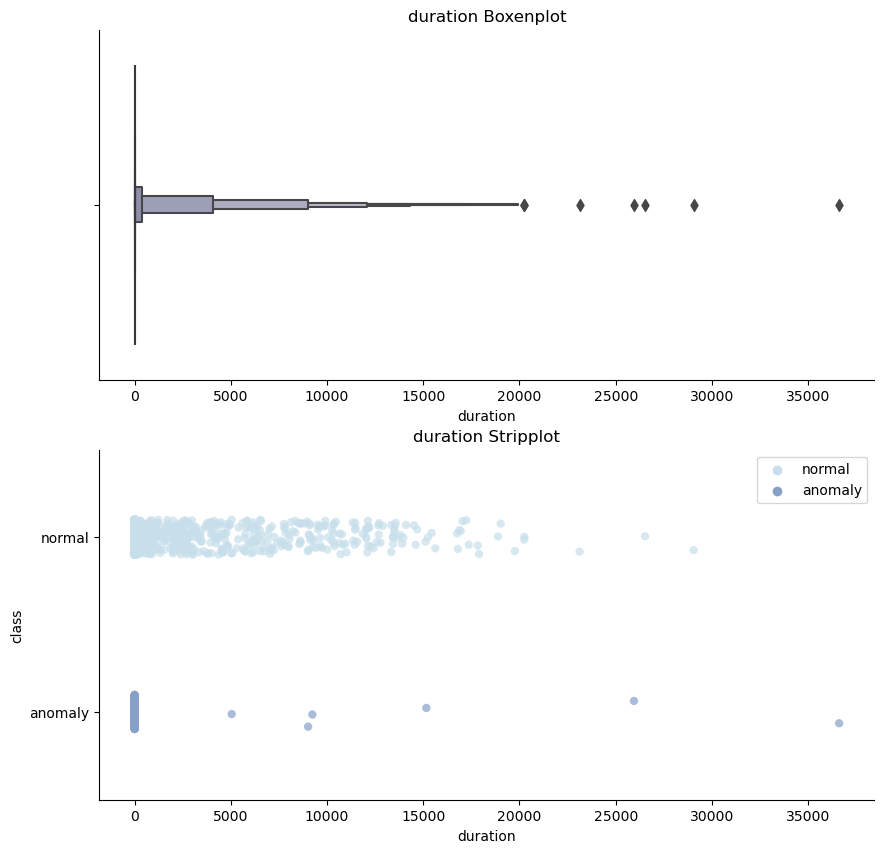

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


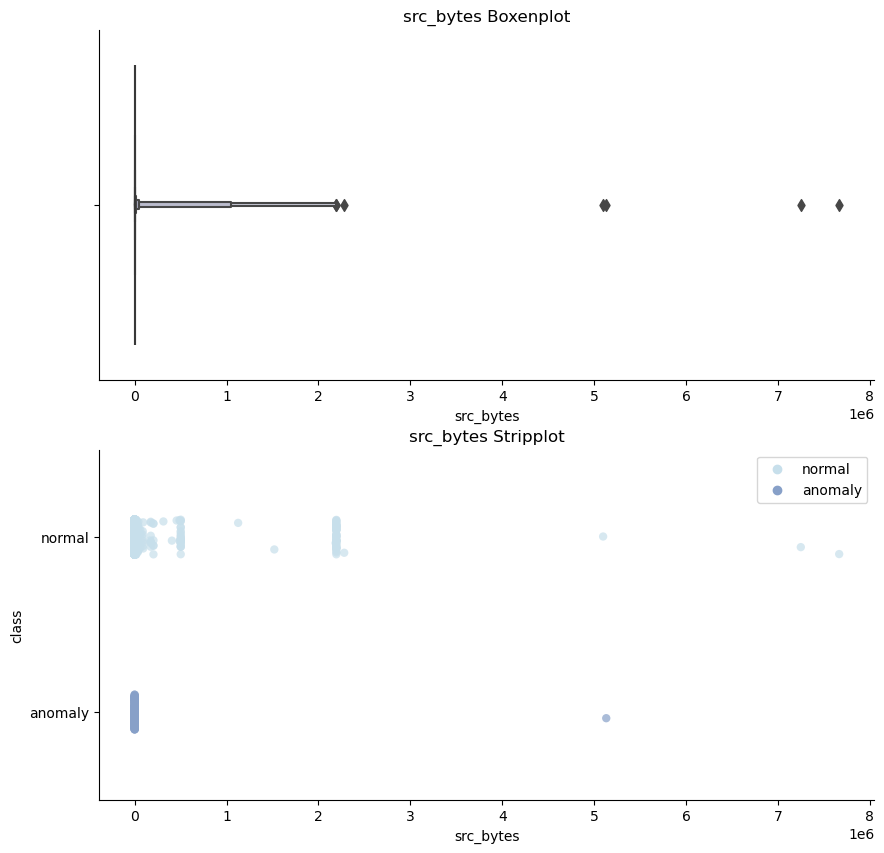

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


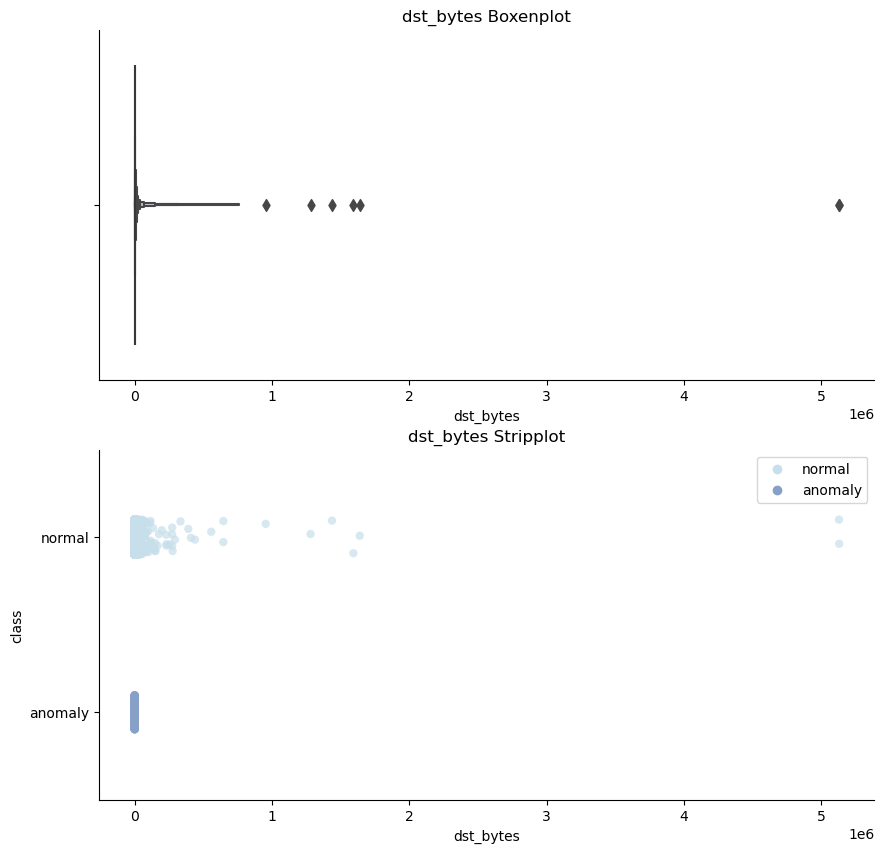

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


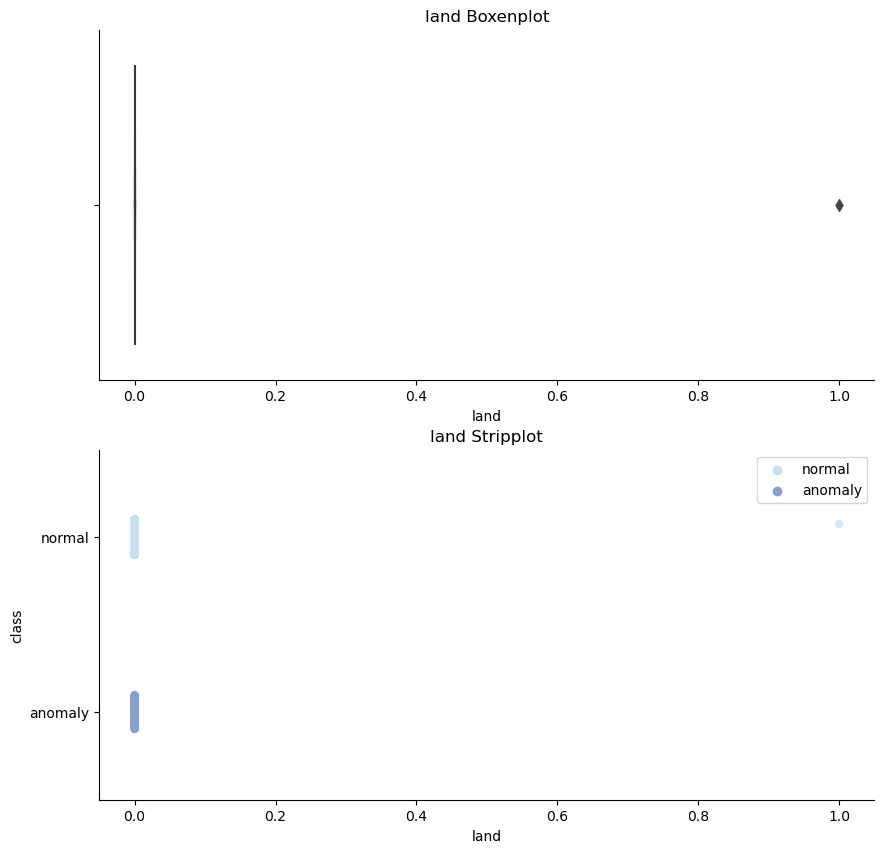

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


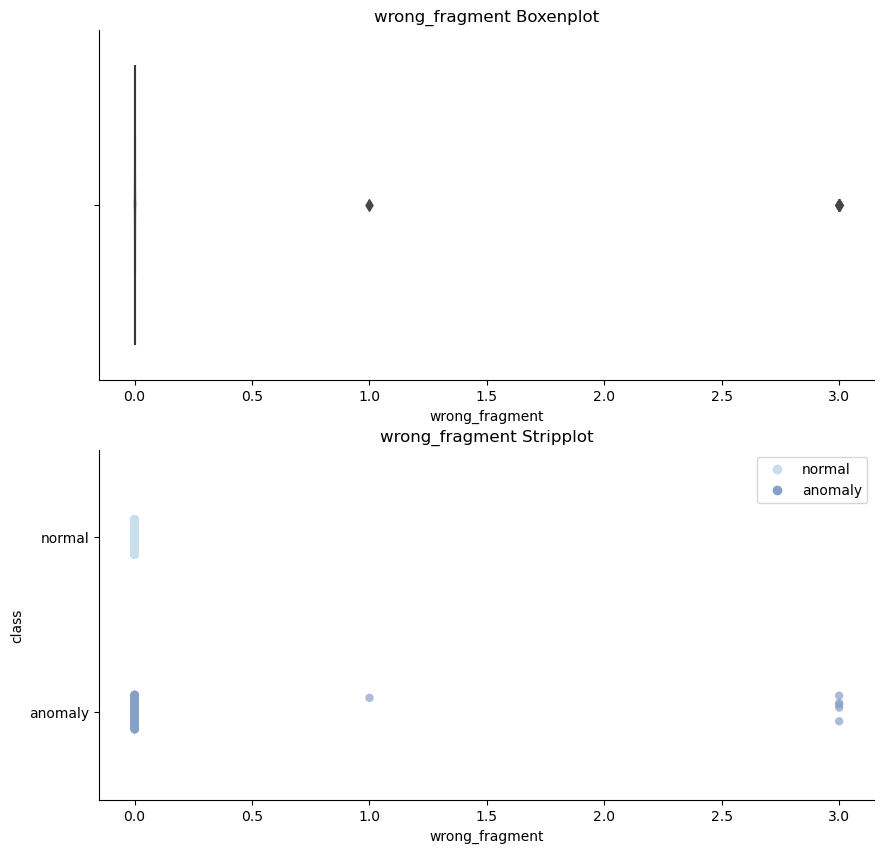

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


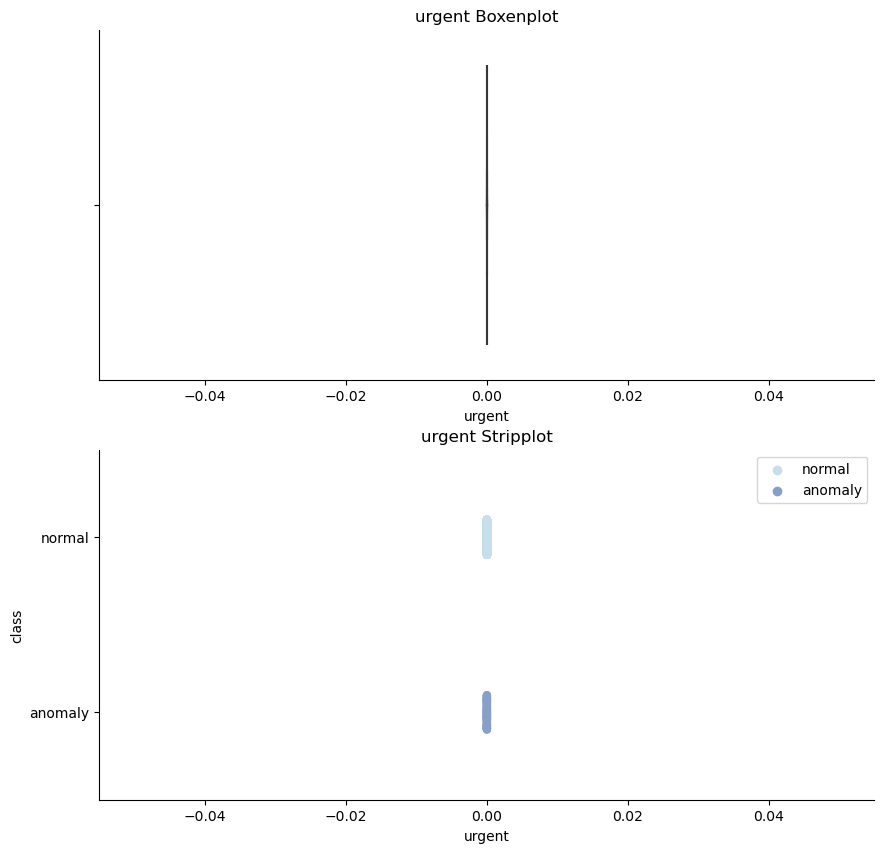

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


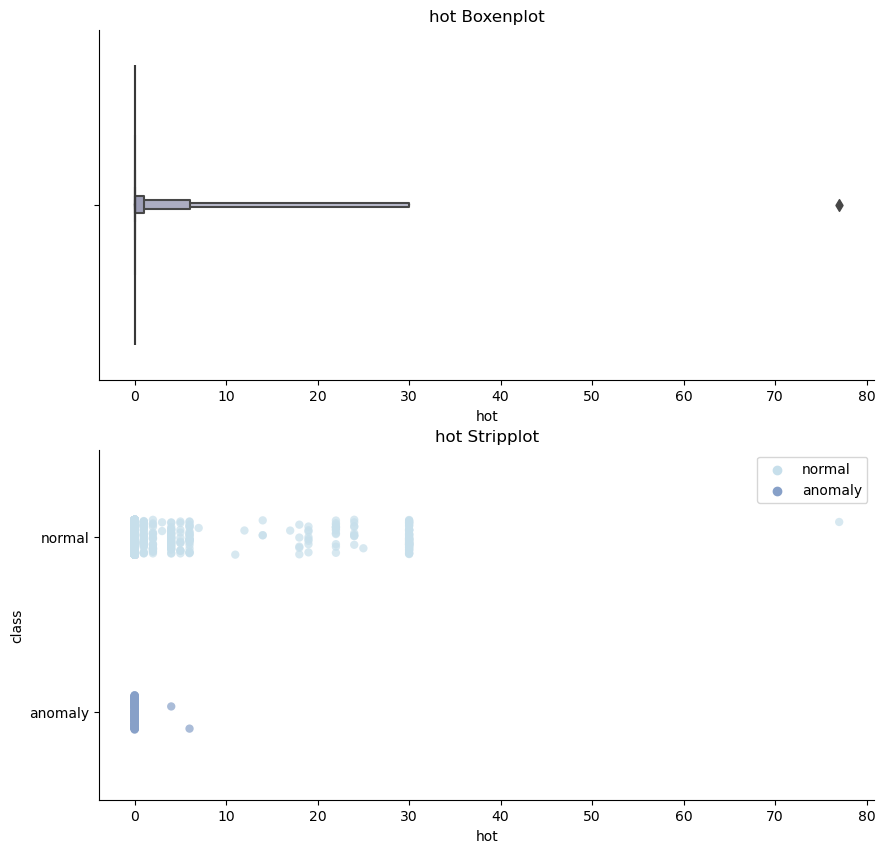

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


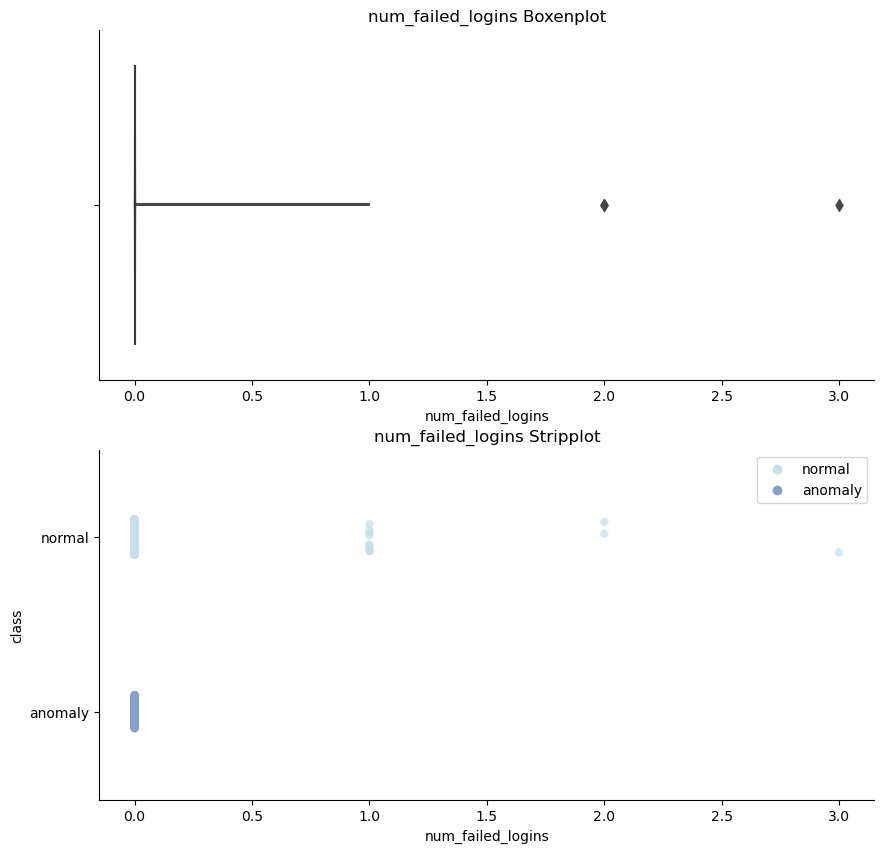

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


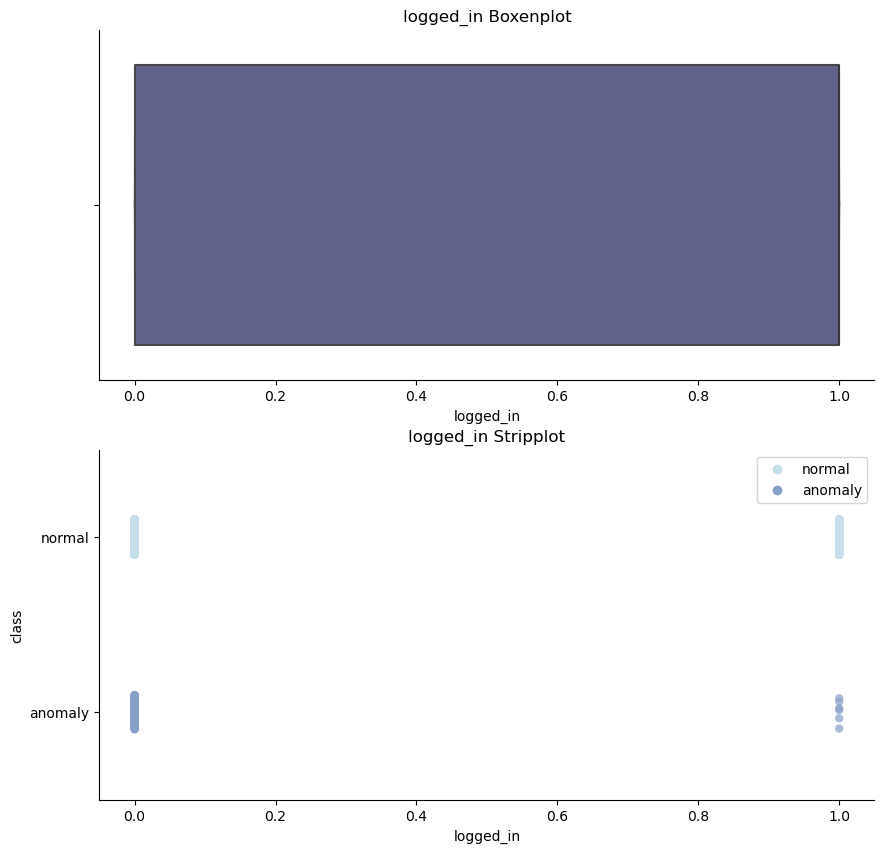

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


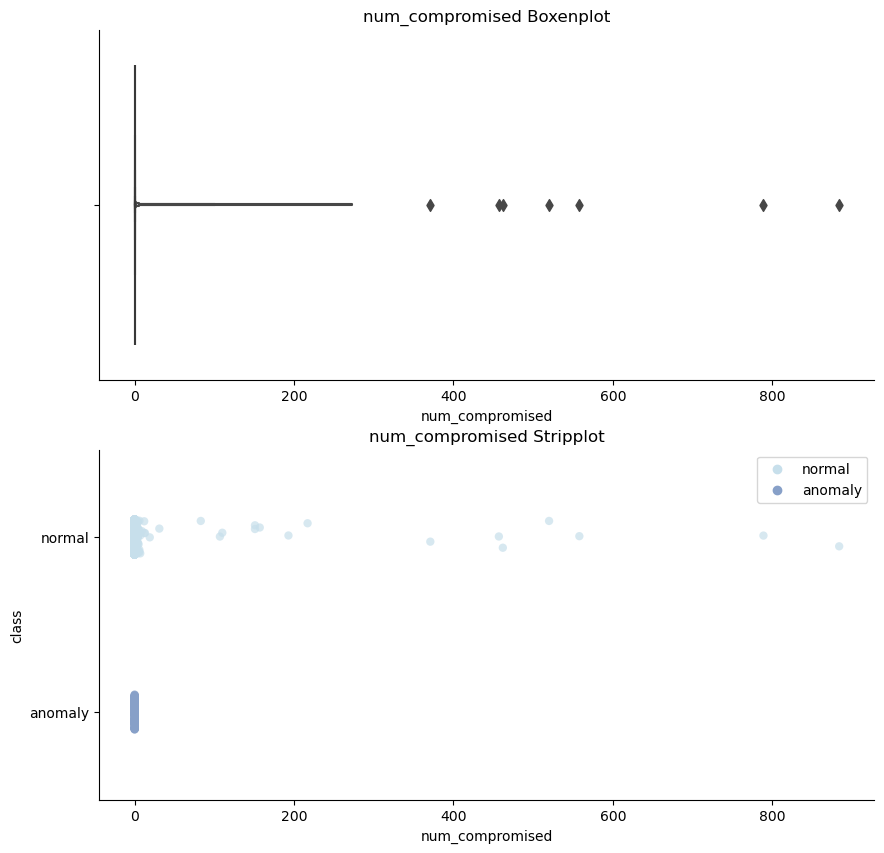

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


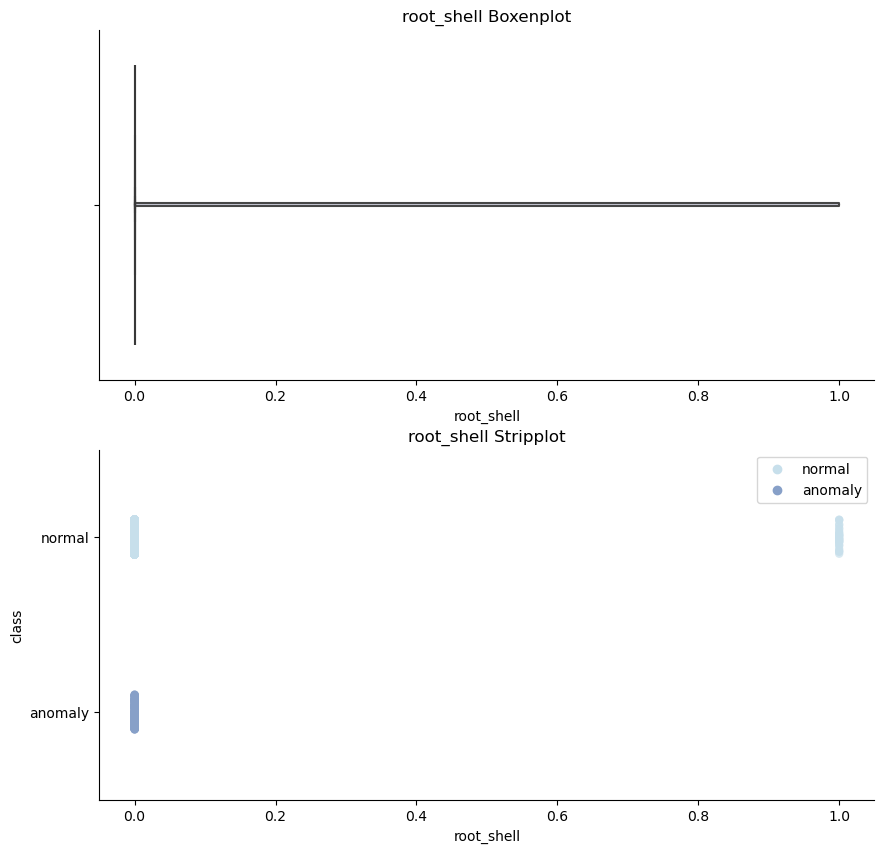

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


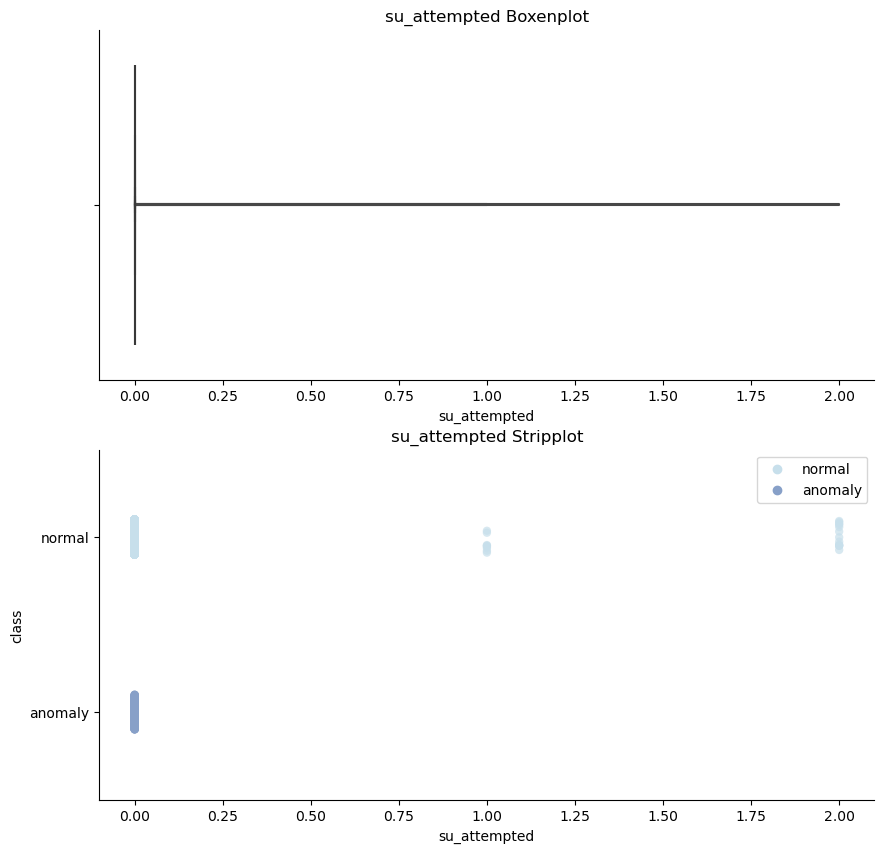

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


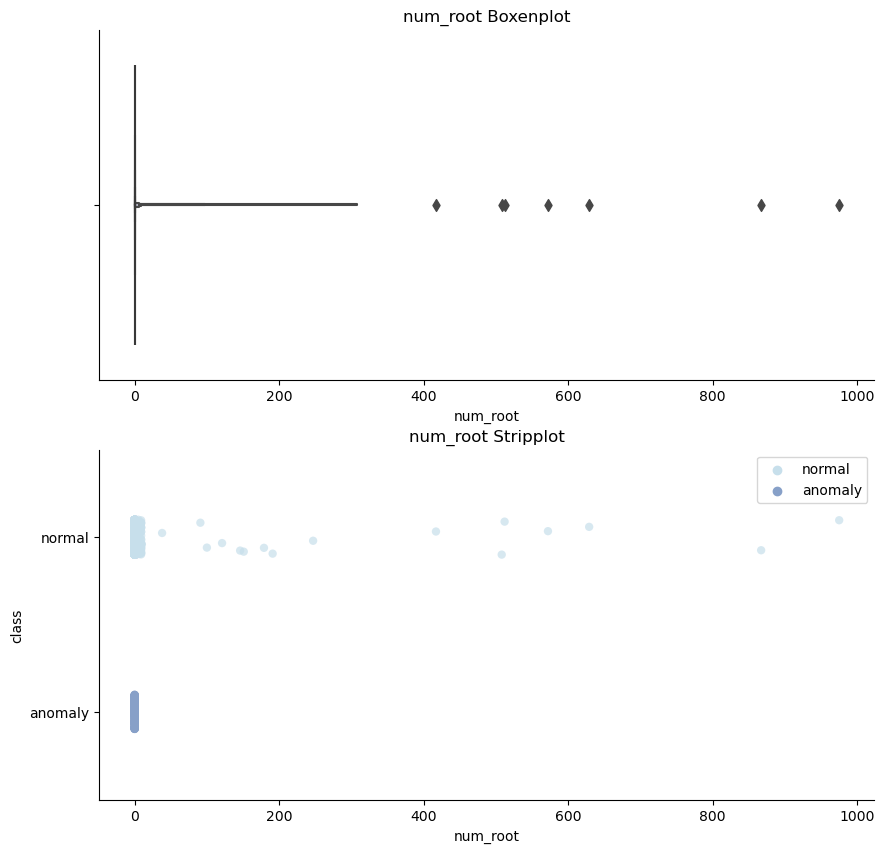

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


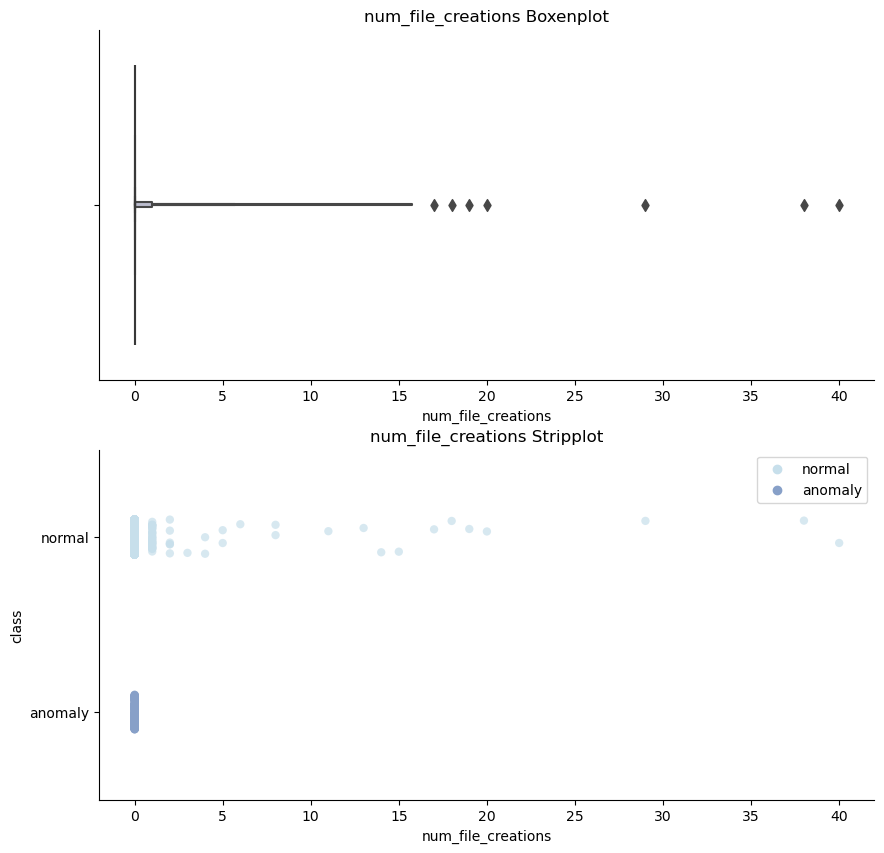

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


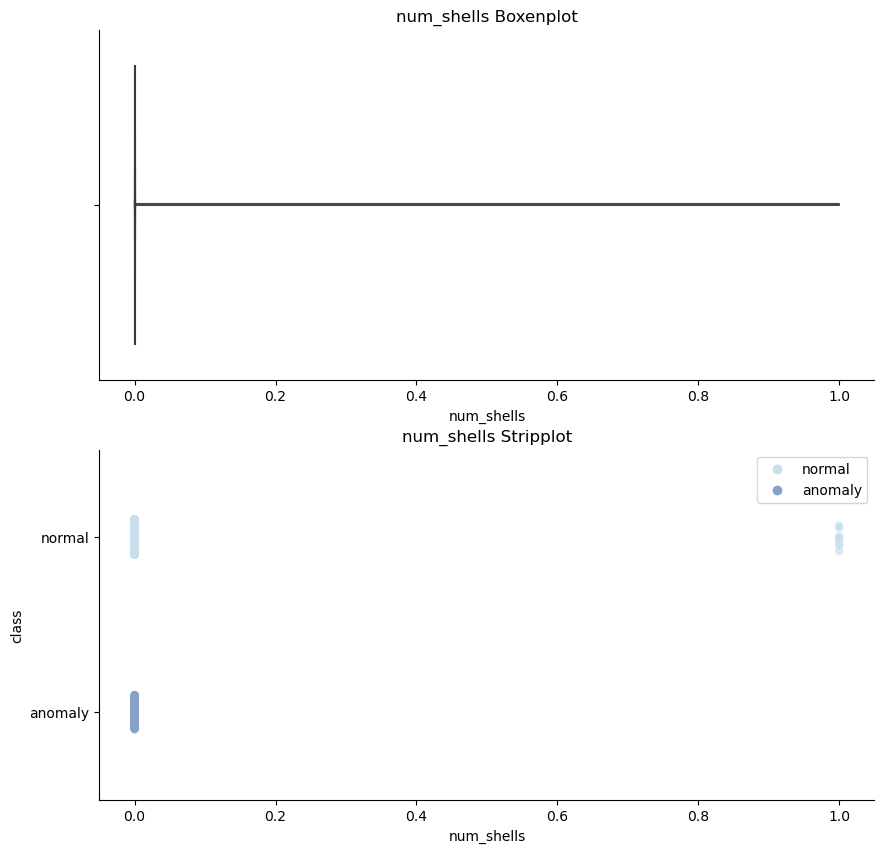

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


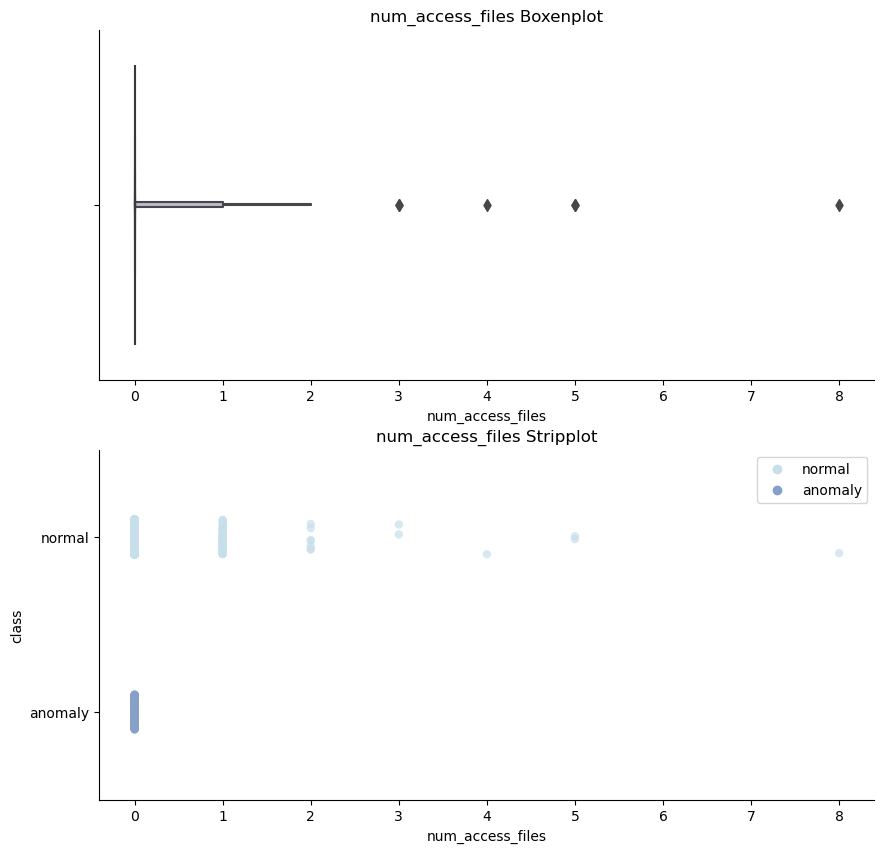

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


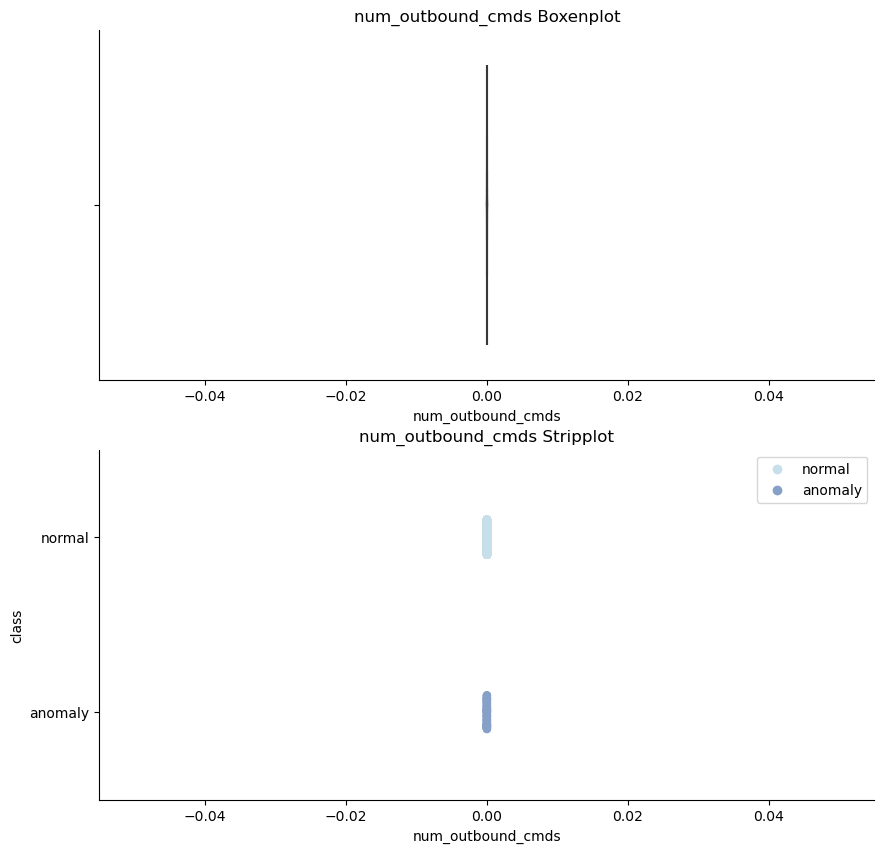

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


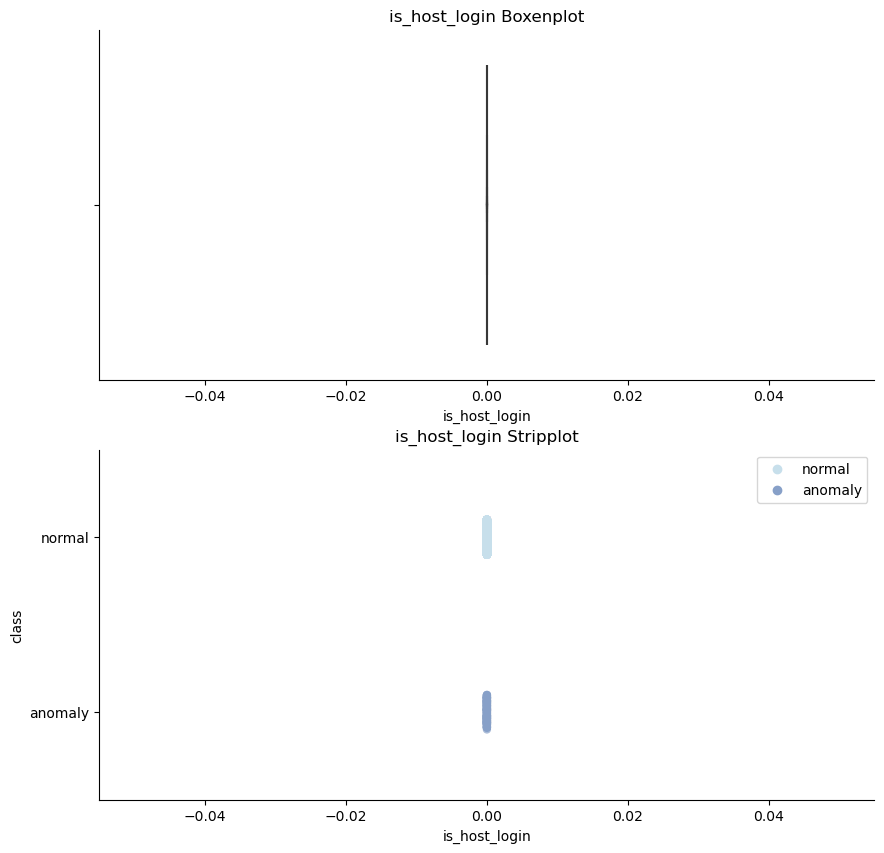

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


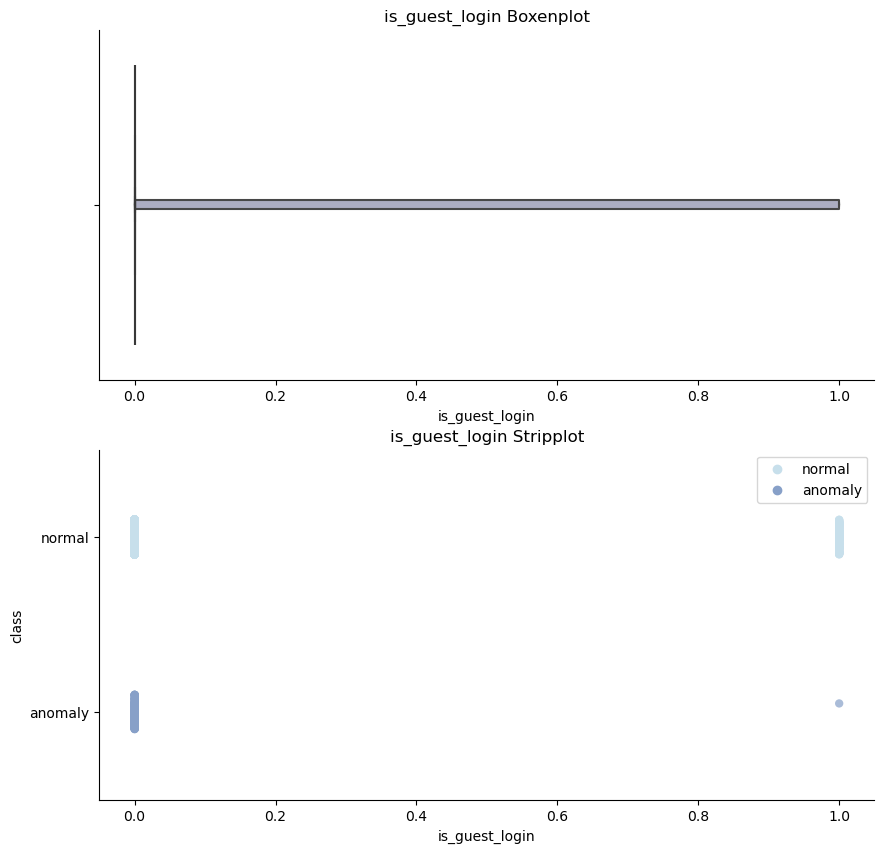

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


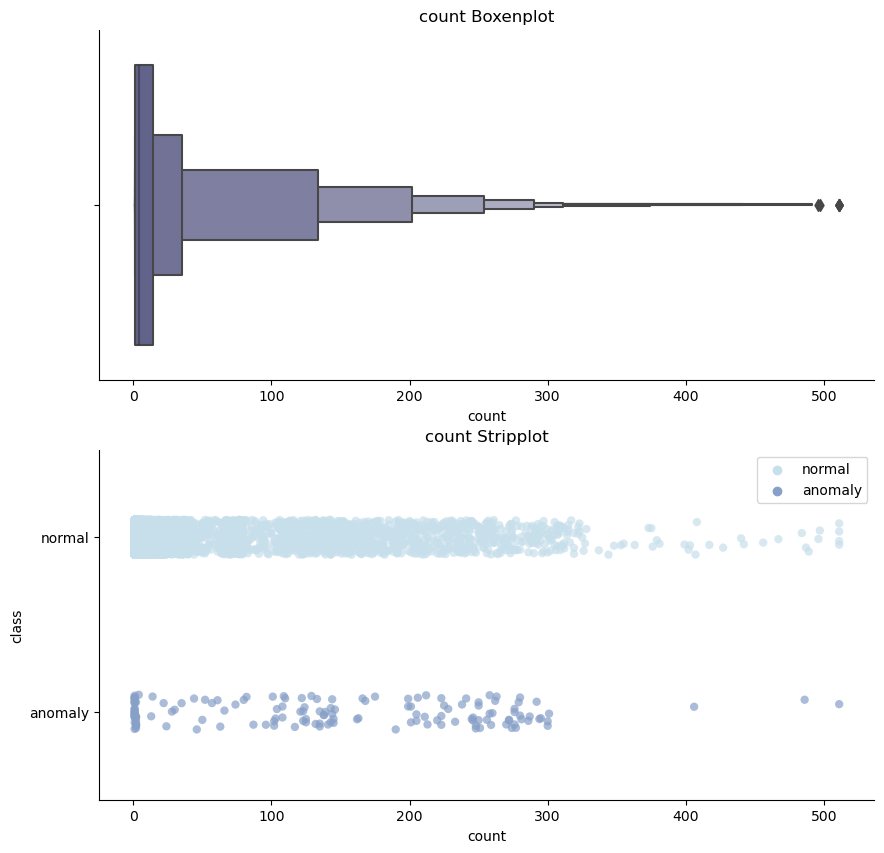

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


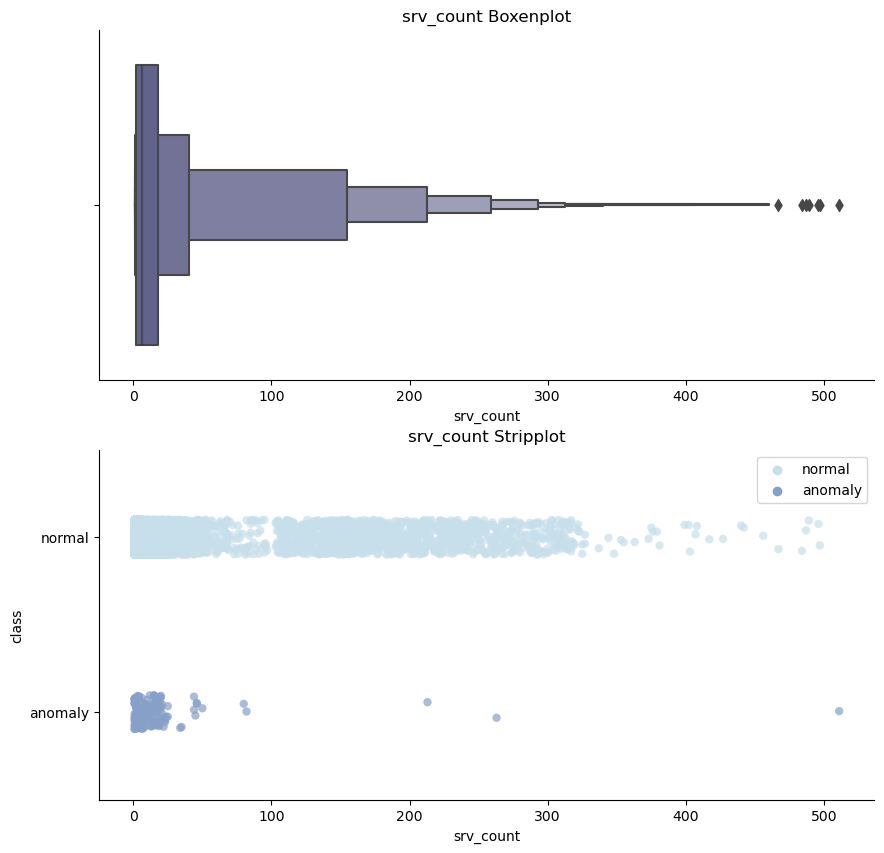

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


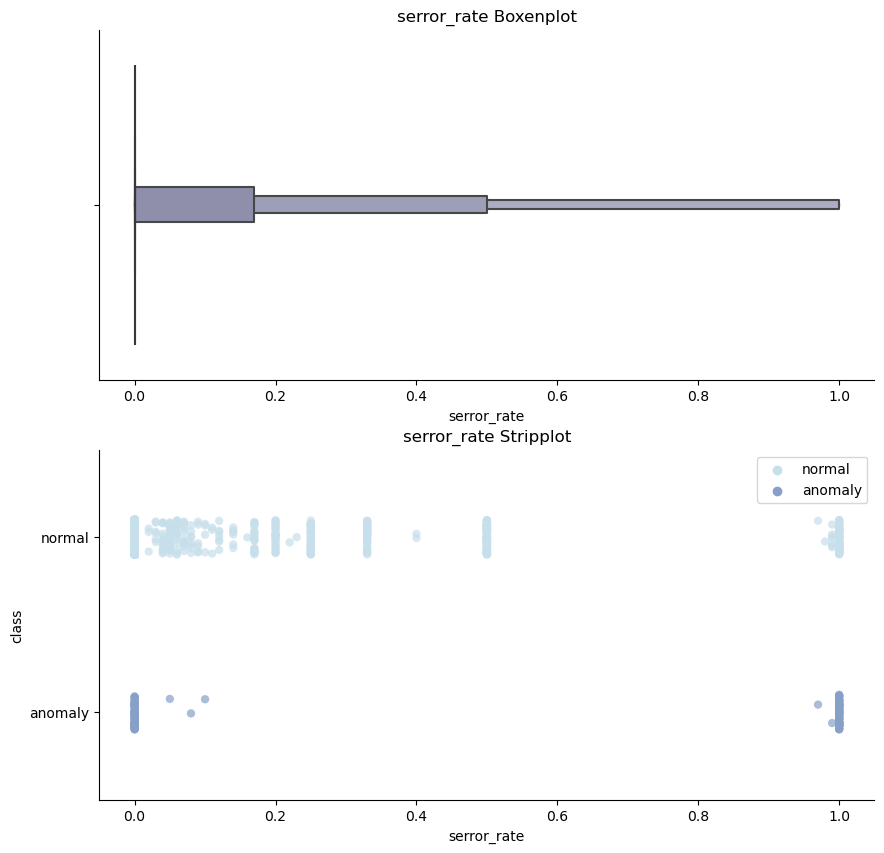

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


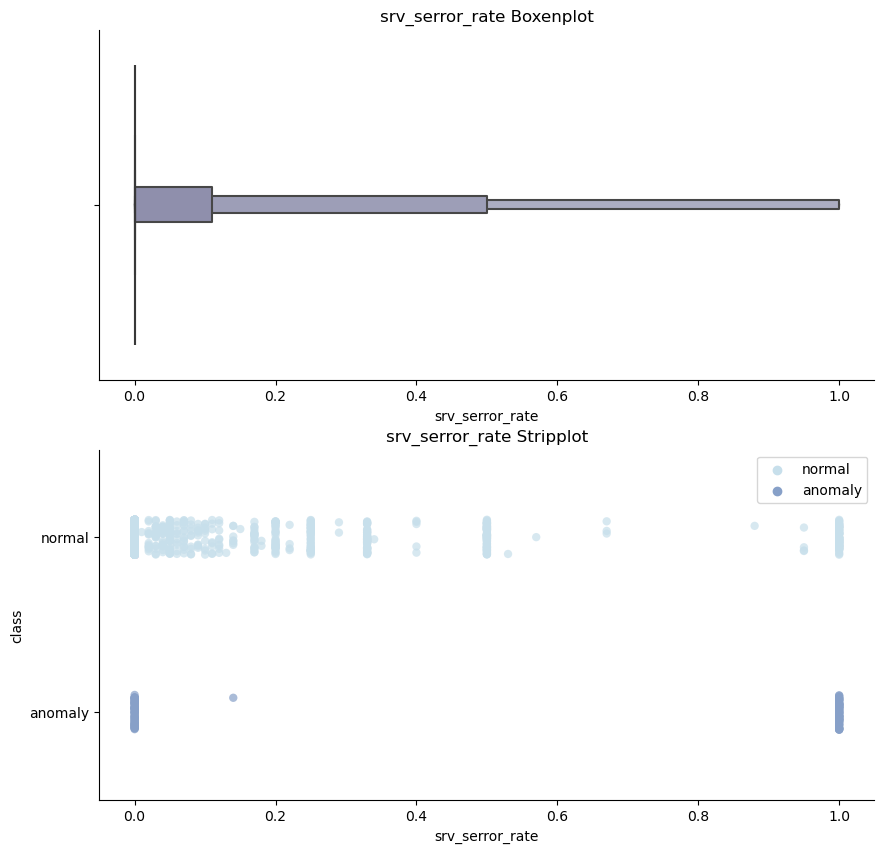

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


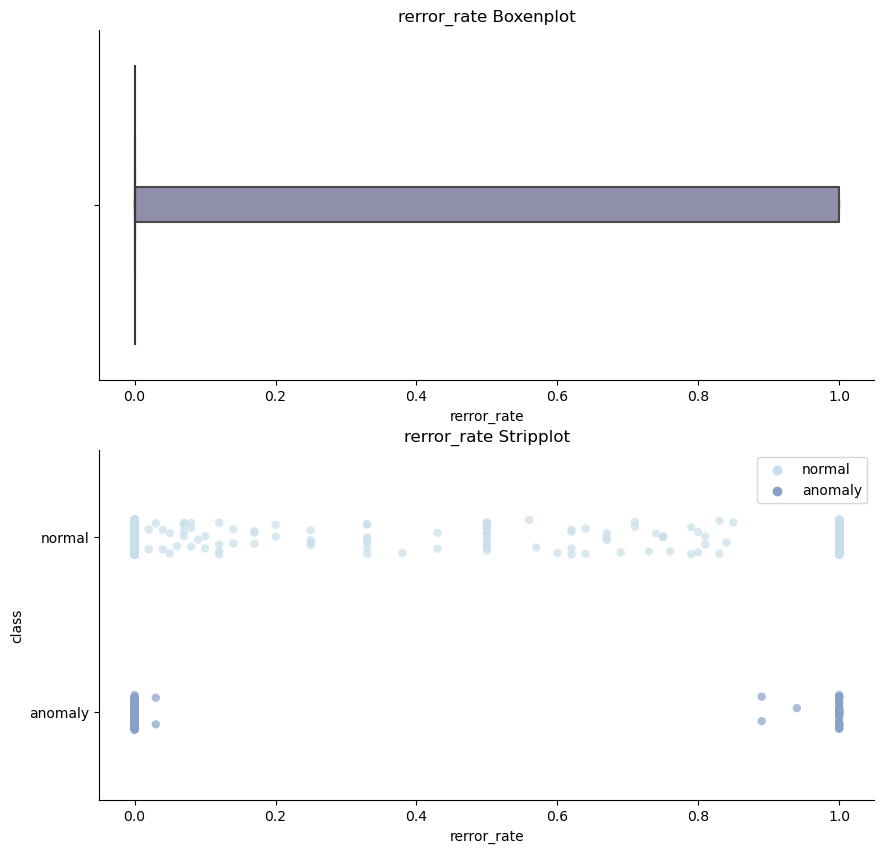

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


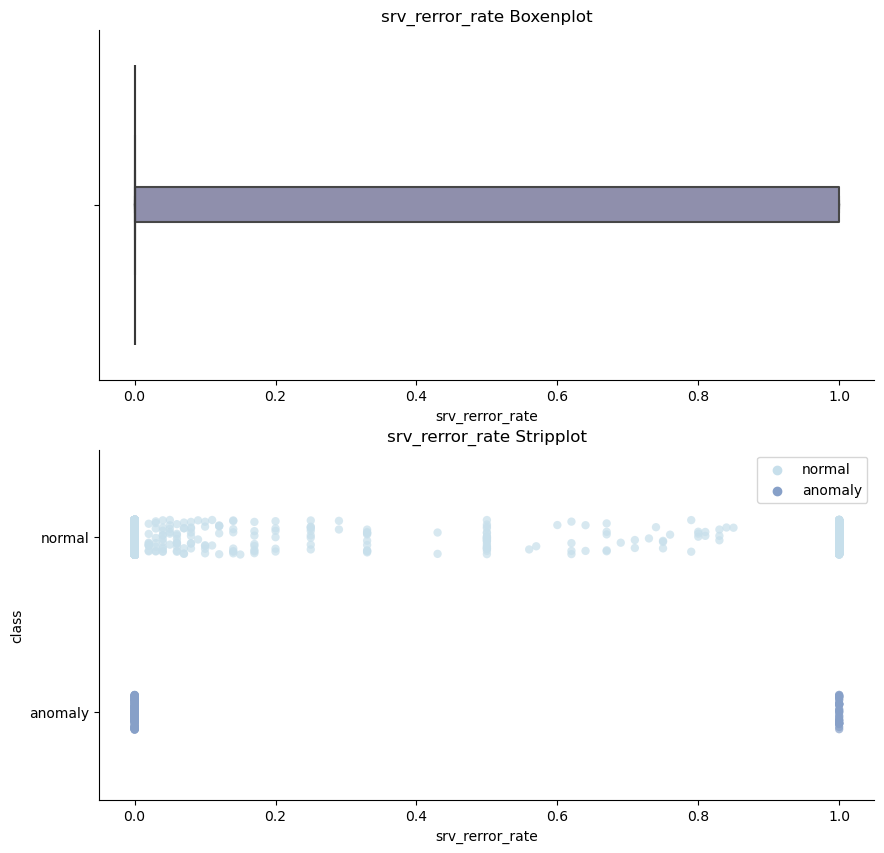

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


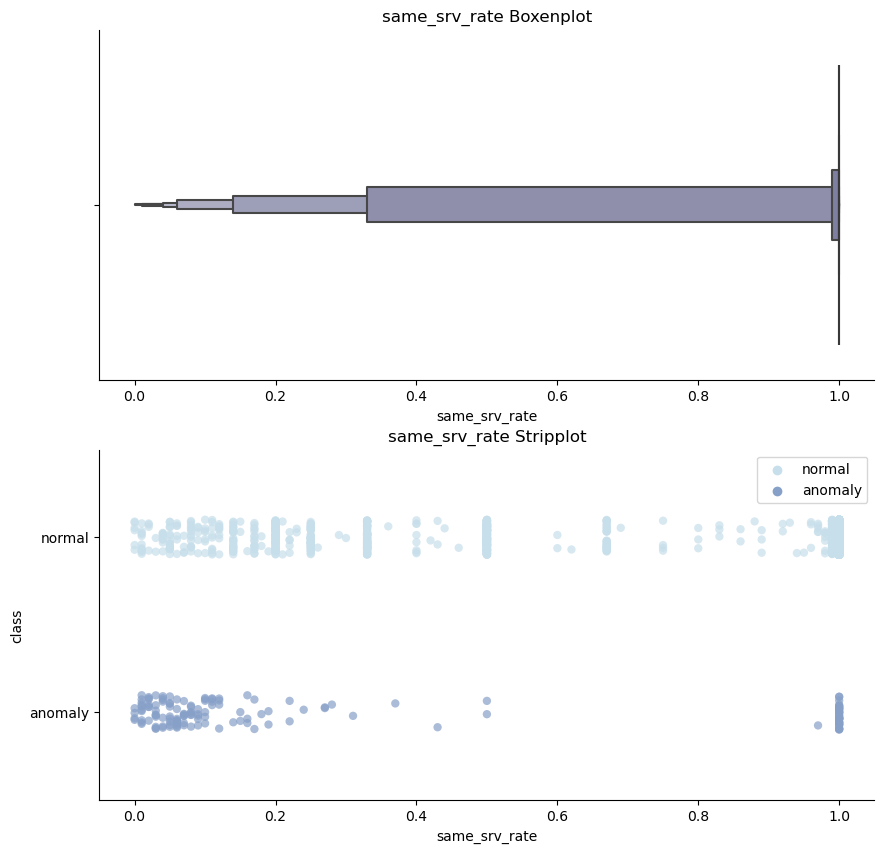

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


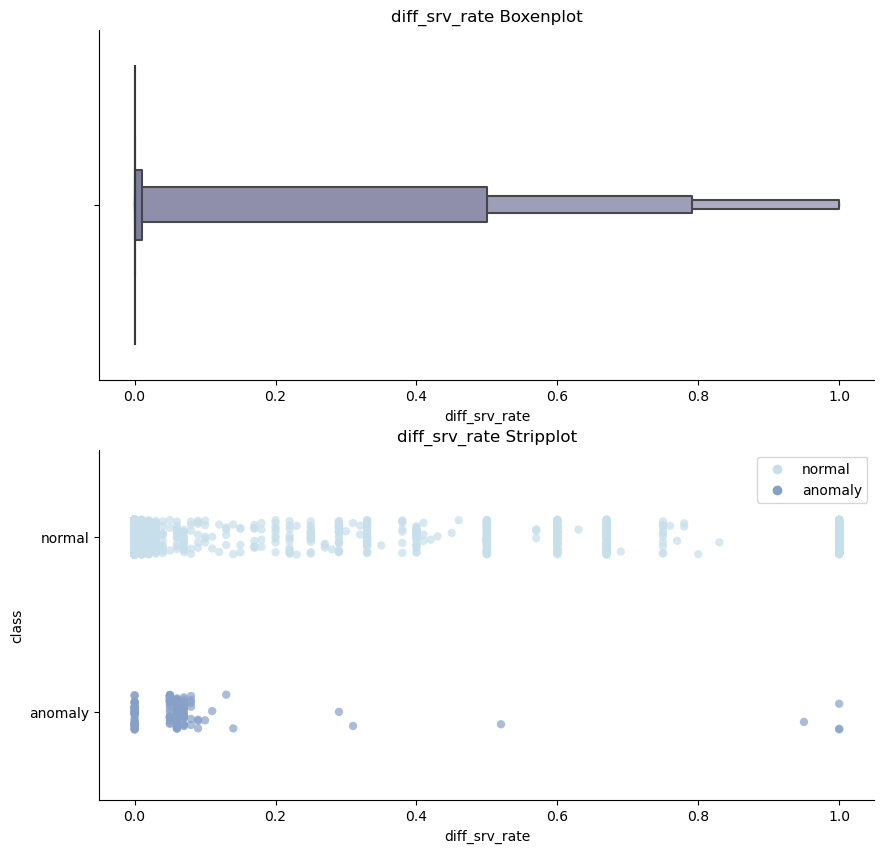

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


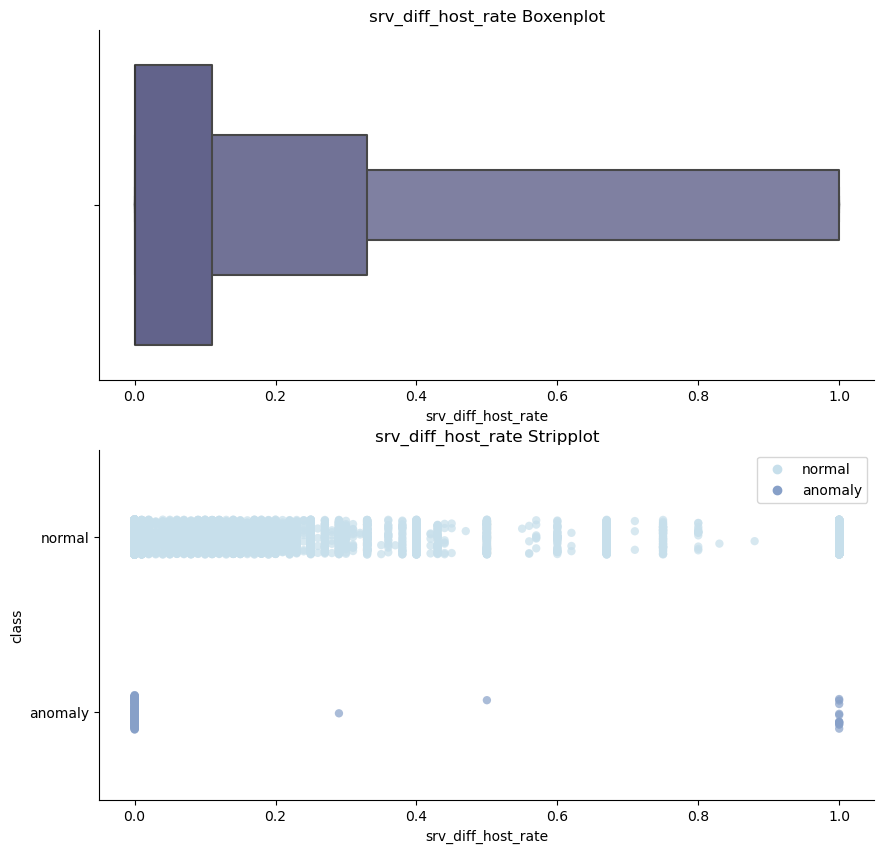

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


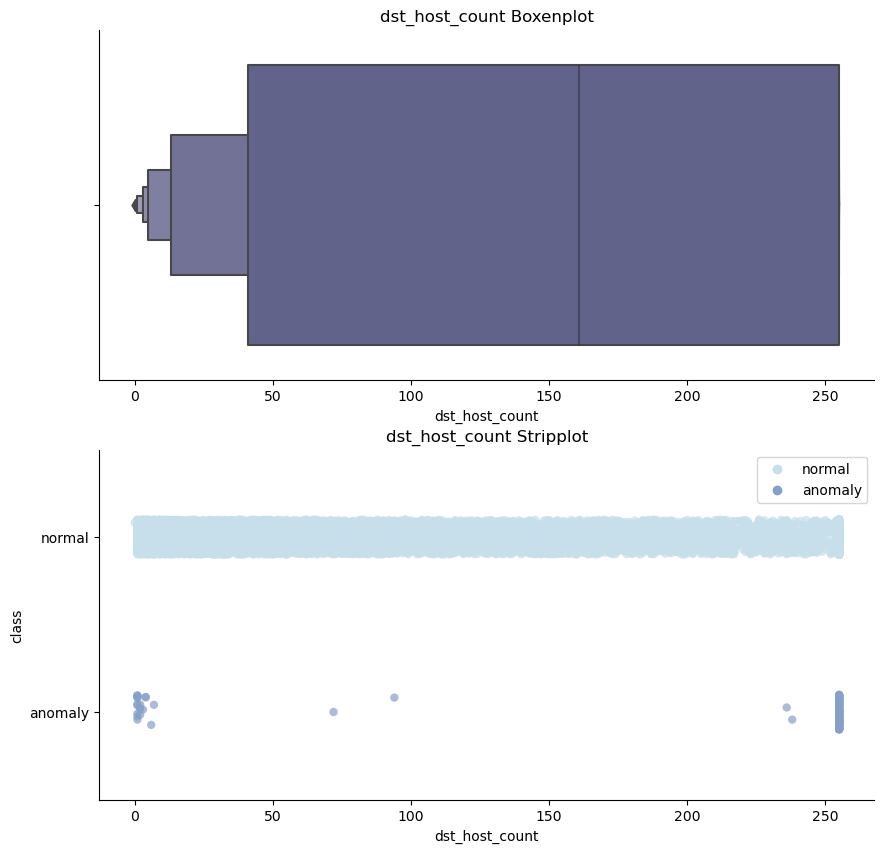

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


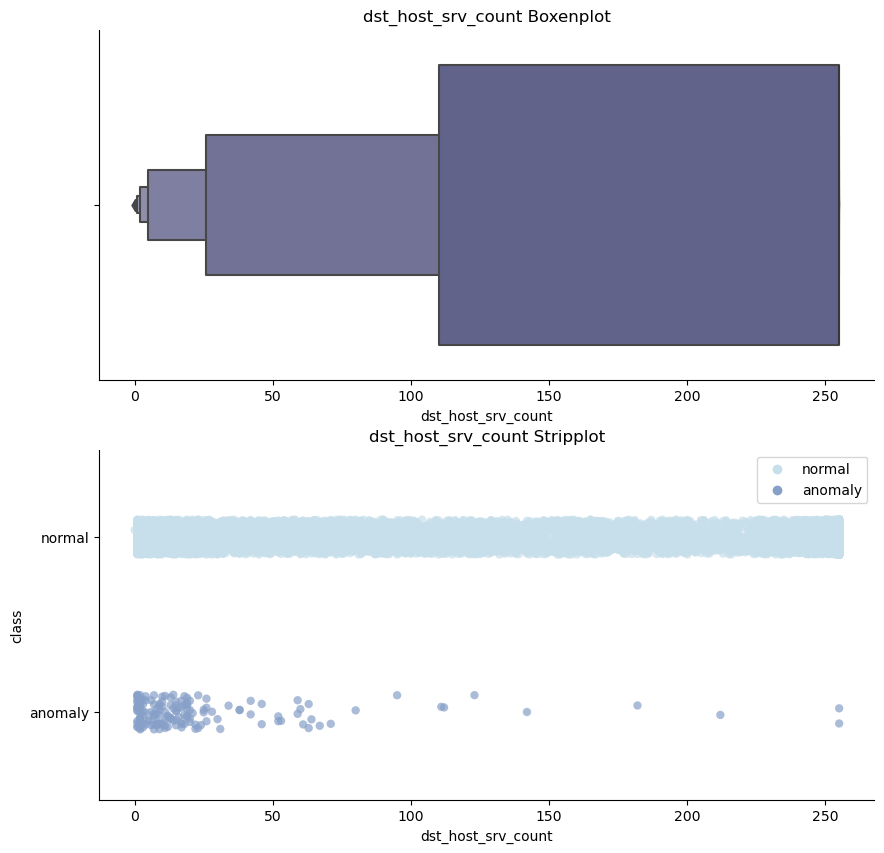

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


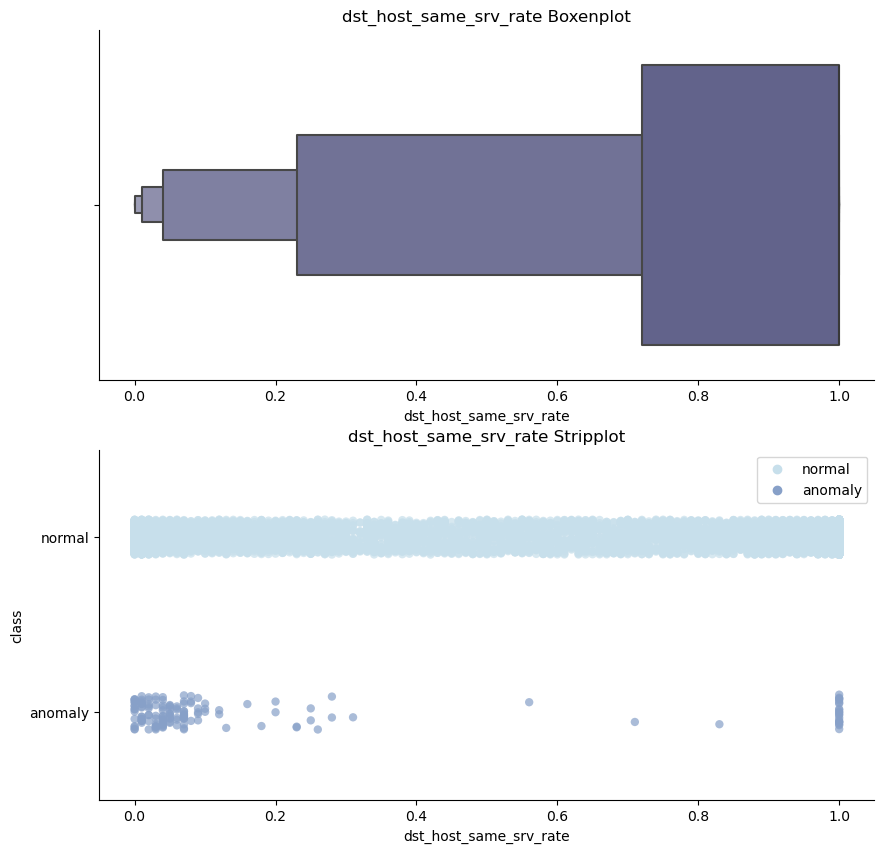

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


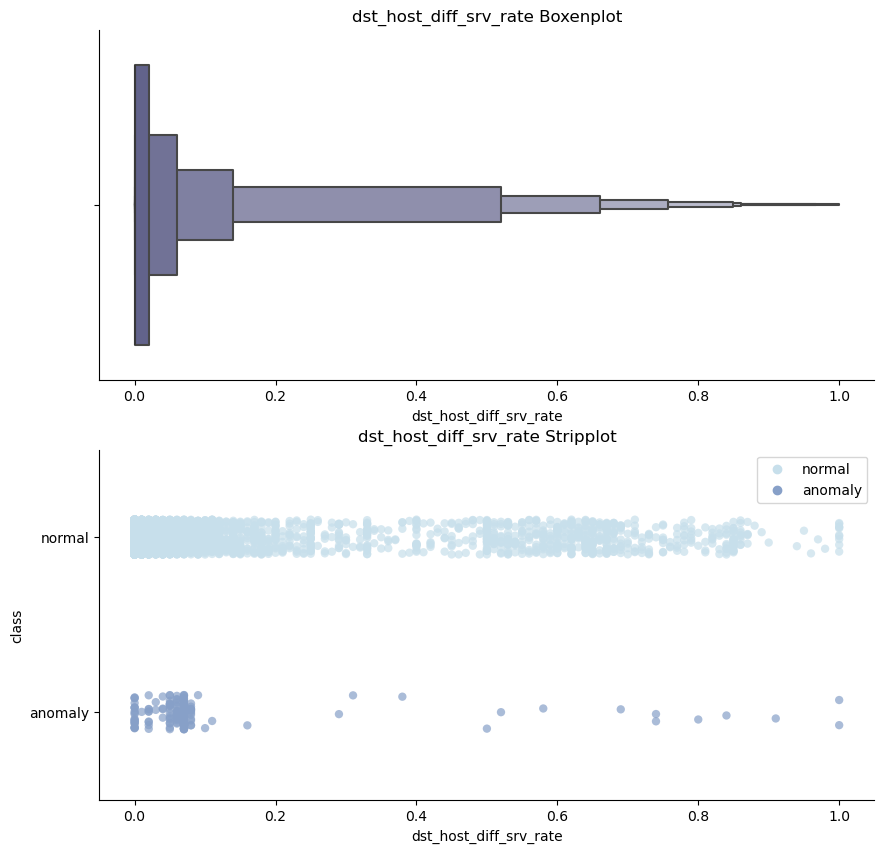

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


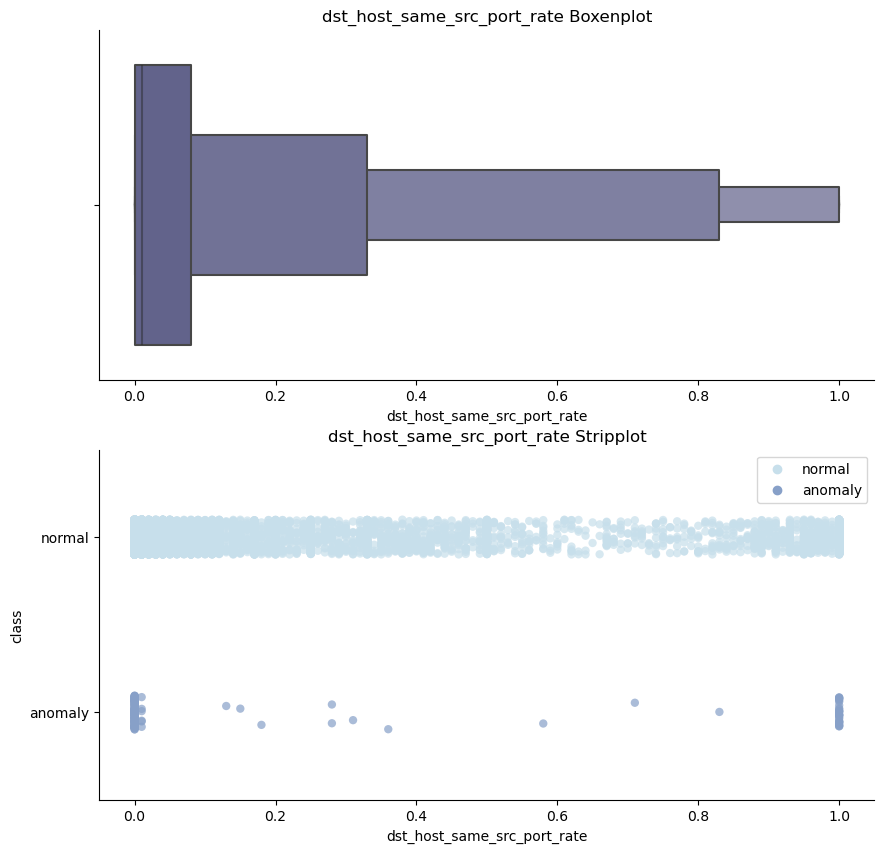

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


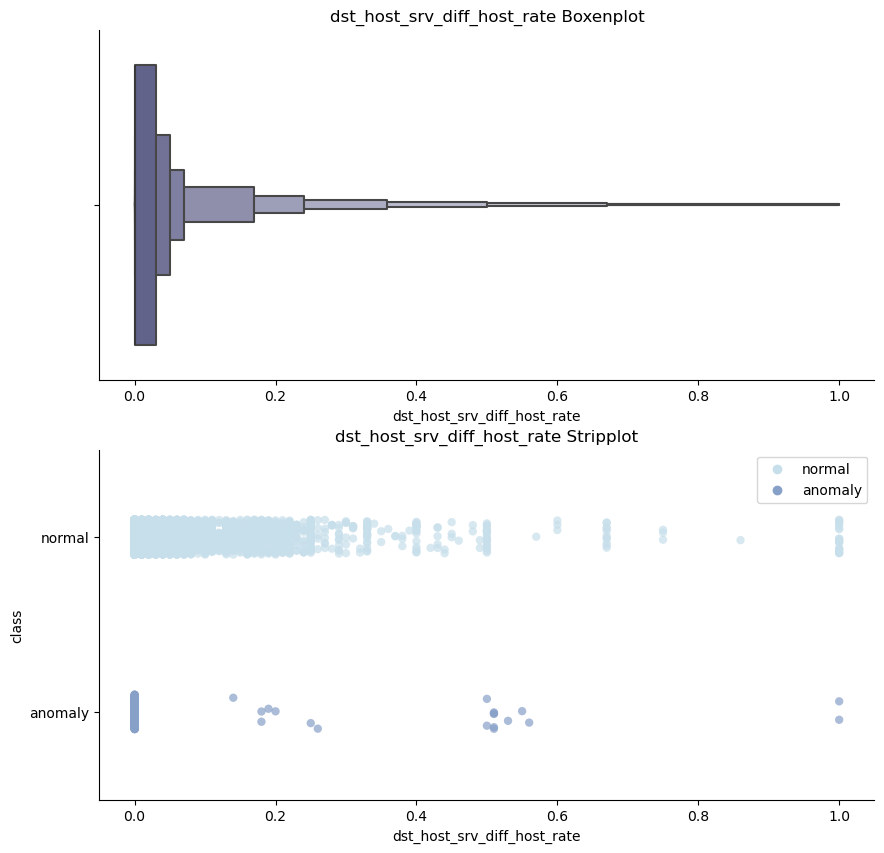

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


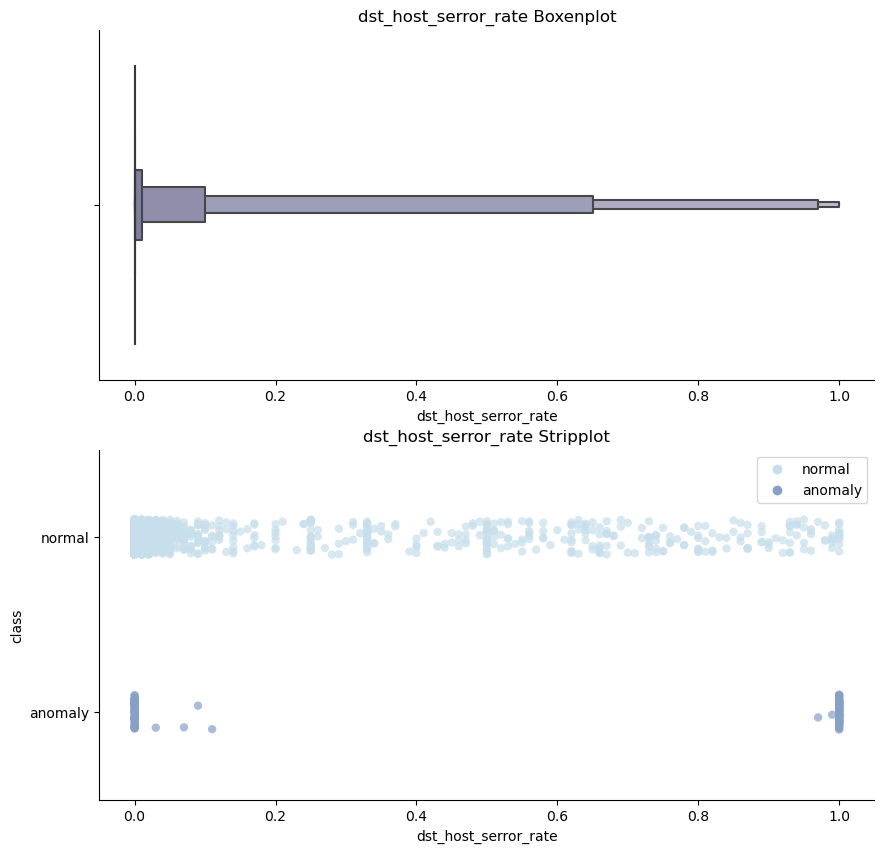

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


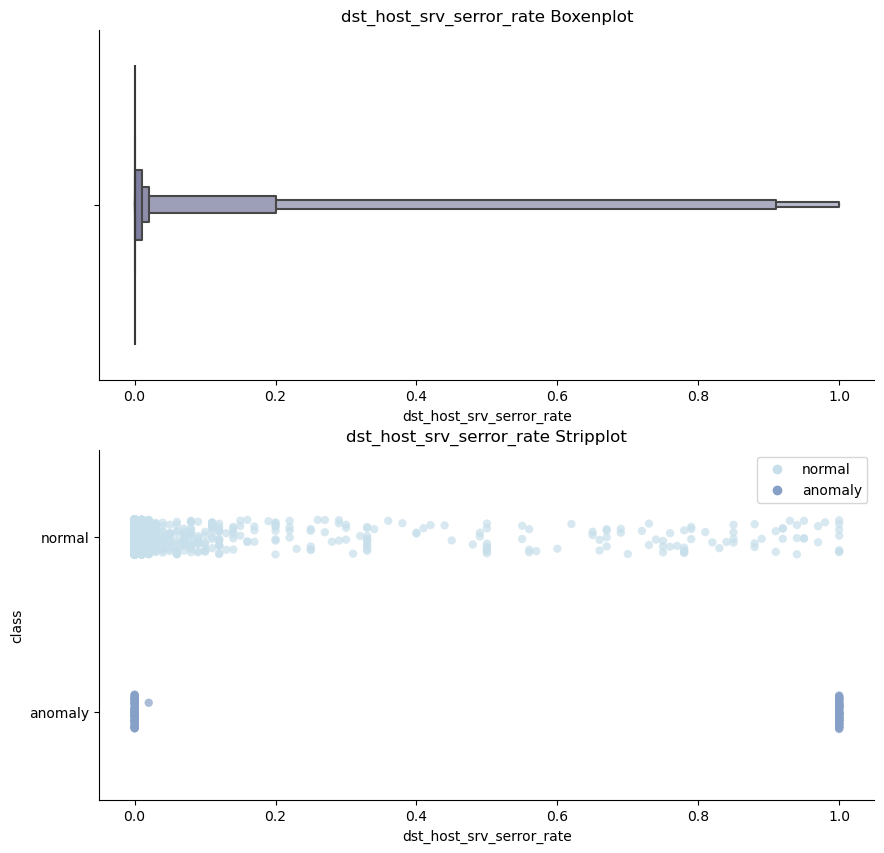

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


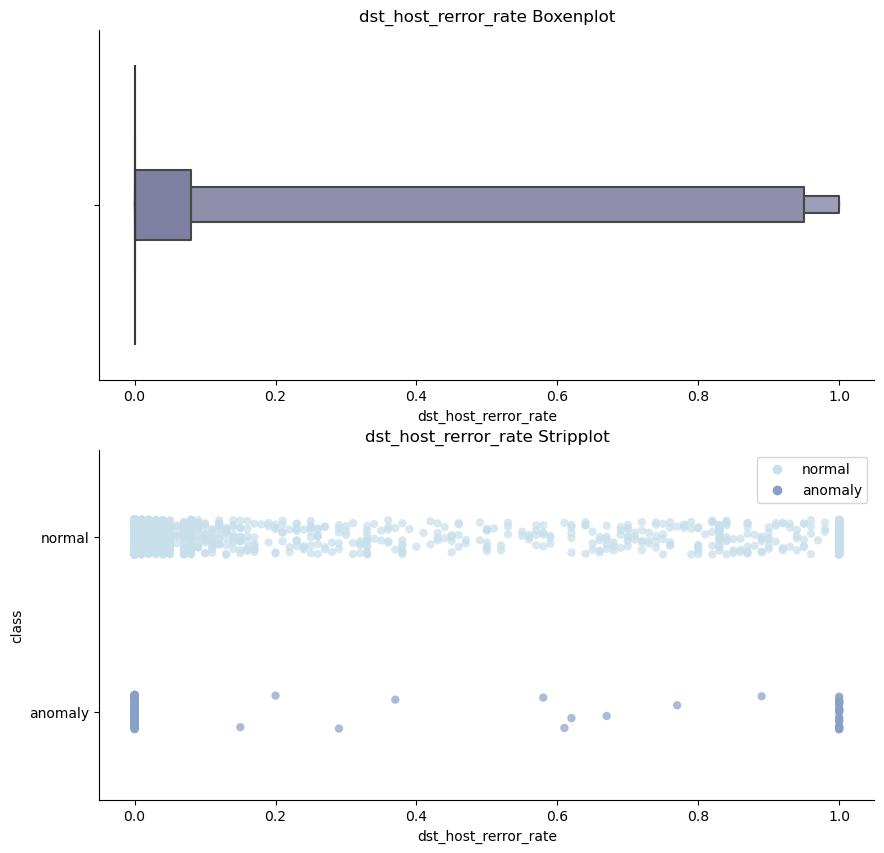

C:\Users\kasia\AppData\Local\Temp\ipykernel_25200\2285421285.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)


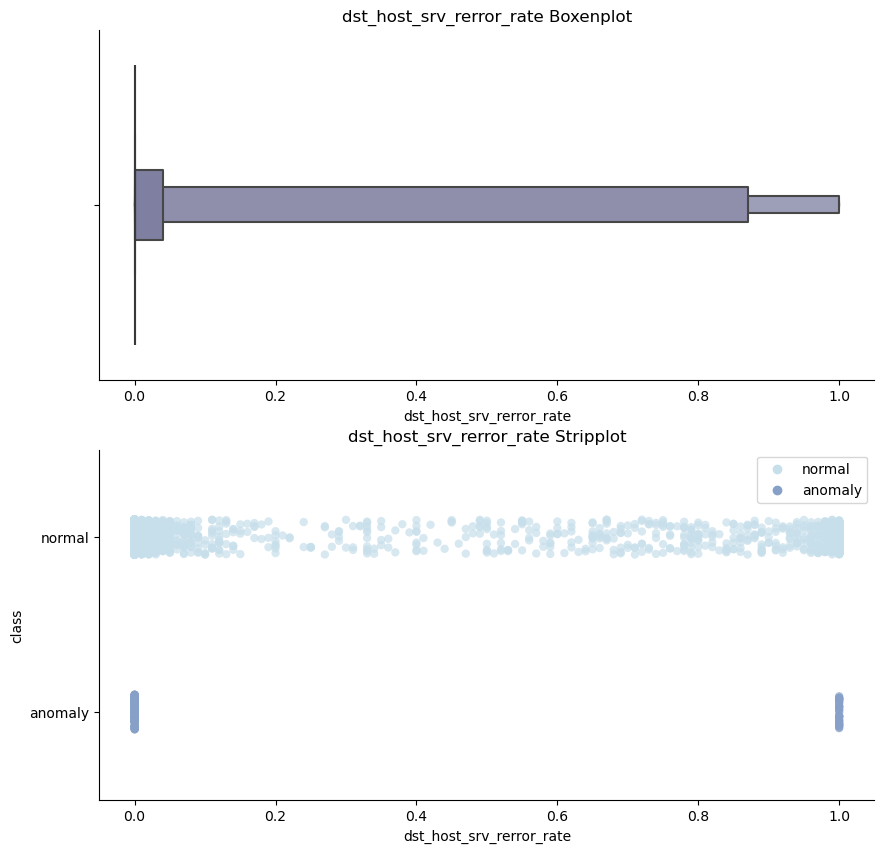

In [11]:


custom_palette = sns.color_palette("ch:s=.25,rot=-.25",n_colors=4)
#
for col in dfPhase.iloc[:, 1:]:             # we ignore id column
    if col != 'class' and is_numeric_dtype(dfPhase[col]):
#
        fig, ax = plt.subplots(2, 1, figsize=(10, 10))
        g1 = sns.boxenplot(x=dfPhase[col], ax=ax[0], color=custom_palette[2], linewidth=1.5)
        g2 = sns.stripplot(x=dfPhase[col], y=dfPhase['class'], ax=ax[1], hue=dfPhase['class'], palette=custom_palette, size=6, marker='o', alpha=0.7)
#
        ax[0].set_title(f"{col} Boxenplot")
        ax[0].set_xlabel(col)
        ax[1].set_title(f"{col} Stripplot")
        ax[1].set_xlabel(col)
        ax[1].set_ylabel("class")
        ax[0].spines['top'].set_visible(False)
        ax[0].spines['right'].set_visible(False)
        ax[1].spines['top'].set_visible(False)
        ax[1].spines['right'].set_visible(False)
#
#
        g2.legend(loc='upper right')
        plt.show()

In [13]:
import category_encoders as ce

encoder = ce.LeaveOneOutEncoder()


from sklearn.preprocessing import LabelEncoder
dfPhase['class'] = LabelEncoder().fit_transform(dfPhase['class'])

for col in dfPhase.columns:
    if col != 'class' and not is_numeric_dtype(dfPhase[col]):
        dfPhase[col] = encoder.fit_transform(dfPhase[col], dfPhase['class']) 
  

### 1.3 Feature selection :



We will use 3 methods for feature selection

<Axes: title={'center': 'Feature-correlation (pearson)'}>

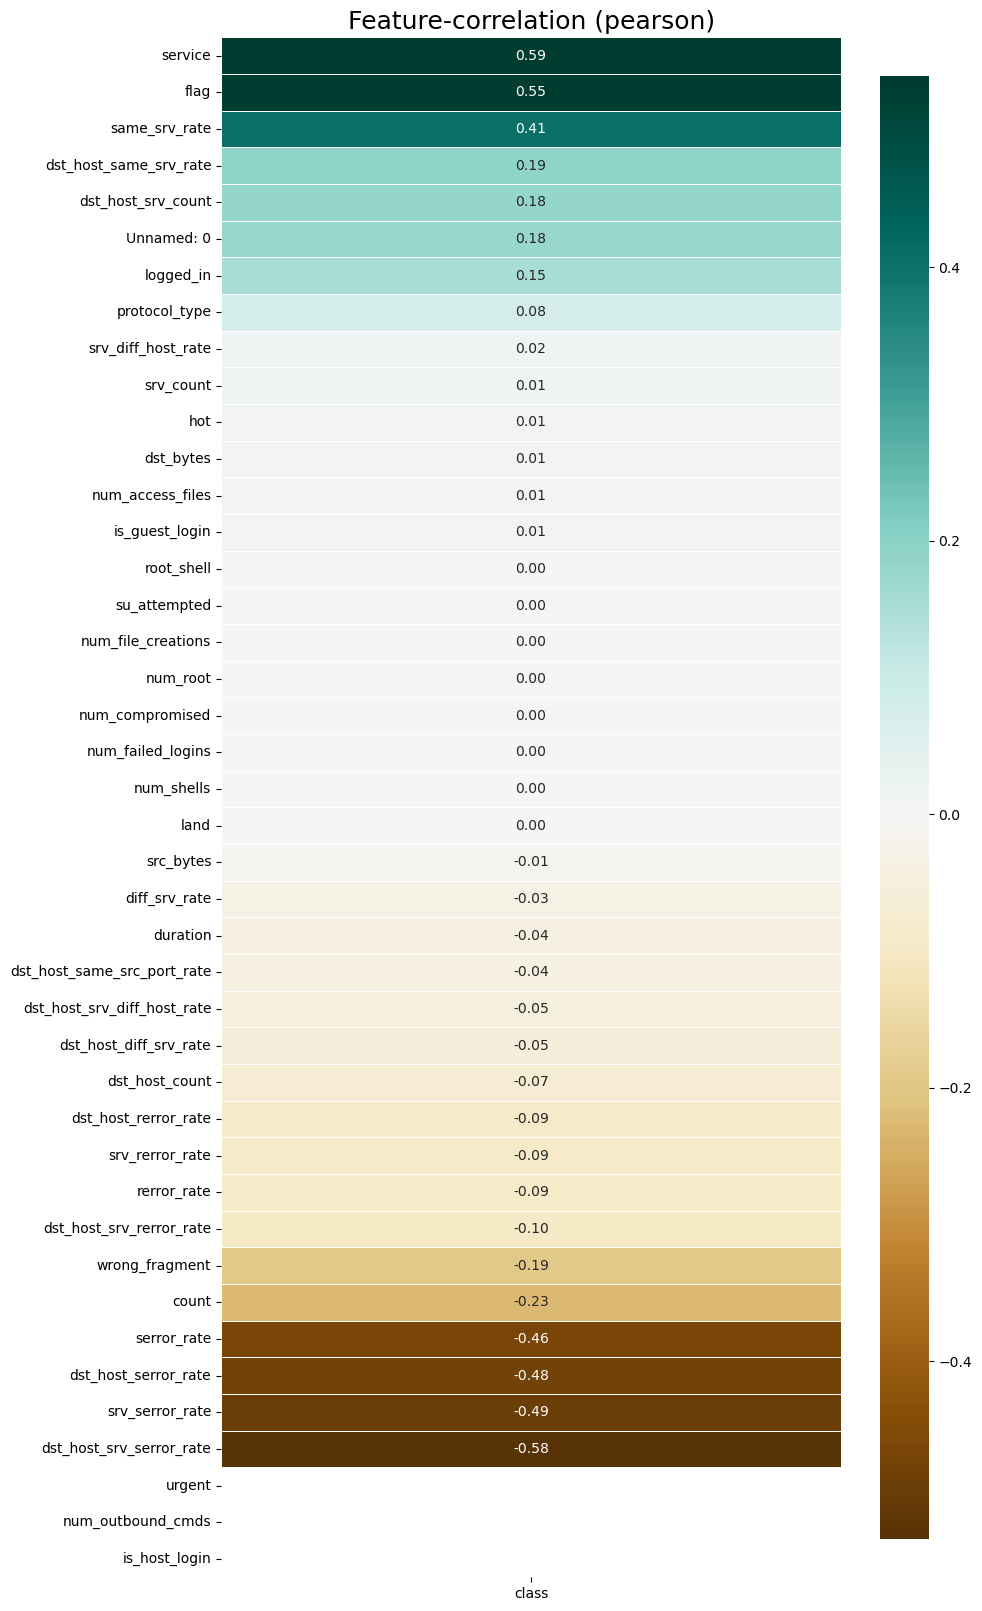

In [14]:
# using coreelation matrix to find the most important features

kl.corr_plot(dfPhase,figsize=(10,20),target='class')

In [15]:
# using catboost to find the most important features

from catboost import CatBoostClassifier

    
X = dfPhase.drop('class',axis=1)
y = dfPhase['class']

    
model = CatBoostClassifier()
model.fit(X,y)

feature_importance = model.get_feature_importance()
feature_names = X.columns
for score, name in sorted(zip(feature_importance, feature_names), reverse=True):
    print('{}: {}'.format(name, score))


Learning rate set to 0.031401
0:	learn: 0.5977902	total: 149ms	remaining: 2m 29s
1:	learn: 0.5066541	total: 157ms	remaining: 1m 18s
2:	learn: 0.4146234	total: 164ms	remaining: 54.5s
3:	learn: 0.3617264	total: 171ms	remaining: 42.5s
4:	learn: 0.3135610	total: 178ms	remaining: 35.5s
5:	learn: 0.2641784	total: 186ms	remaining: 30.7s
6:	learn: 0.2220096	total: 193ms	remaining: 27.4s
7:	learn: 0.1901283	total: 201ms	remaining: 24.9s
8:	learn: 0.1712484	total: 209ms	remaining: 23s
9:	learn: 0.1426081	total: 218ms	remaining: 21.5s
10:	learn: 0.1174143	total: 226ms	remaining: 20.3s
11:	learn: 0.0993263	total: 234ms	remaining: 19.3s
12:	learn: 0.0830469	total: 242ms	remaining: 18.3s
13:	learn: 0.0695413	total: 249ms	remaining: 17.5s
14:	learn: 0.0587573	total: 256ms	remaining: 16.8s
15:	learn: 0.0496419	total: 262ms	remaining: 16.1s
16:	learn: 0.0427454	total: 269ms	remaining: 15.5s
17:	learn: 0.0364819	total: 275ms	remaining: 15s
18:	learn: 0.0313207	total: 281ms	remaining: 14.5s
19:	learn: 0.

192:	learn: 0.0003475	total: 1.46s	remaining: 6.12s
193:	learn: 0.0003475	total: 1.47s	remaining: 6.13s
194:	learn: 0.0003461	total: 1.48s	remaining: 6.12s
195:	learn: 0.0003461	total: 1.49s	remaining: 6.11s
196:	learn: 0.0003449	total: 1.5s	remaining: 6.1s
197:	learn: 0.0003449	total: 1.5s	remaining: 6.09s
198:	learn: 0.0003435	total: 1.51s	remaining: 6.1s
199:	learn: 0.0003435	total: 1.52s	remaining: 6.09s
200:	learn: 0.0003435	total: 1.53s	remaining: 6.08s
201:	learn: 0.0003435	total: 1.54s	remaining: 6.08s
202:	learn: 0.0003420	total: 1.54s	remaining: 6.07s
203:	learn: 0.0003406	total: 1.55s	remaining: 6.07s
204:	learn: 0.0003392	total: 1.56s	remaining: 6.07s
205:	learn: 0.0003393	total: 1.57s	remaining: 6.06s
206:	learn: 0.0003392	total: 1.58s	remaining: 6.05s
207:	learn: 0.0003378	total: 1.58s	remaining: 6.04s
208:	learn: 0.0003377	total: 1.59s	remaining: 6.04s
209:	learn: 0.0003378	total: 1.6s	remaining: 6.03s
210:	learn: 0.0003362	total: 1.61s	remaining: 6.03s
211:	learn: 0.000

356:	learn: 0.0003233	total: 2.47s	remaining: 4.46s
357:	learn: 0.0003233	total: 2.48s	remaining: 4.45s
358:	learn: 0.0003233	total: 2.49s	remaining: 4.45s
359:	learn: 0.0003233	total: 2.5s	remaining: 4.44s
360:	learn: 0.0003233	total: 2.51s	remaining: 4.44s
361:	learn: 0.0003233	total: 2.51s	remaining: 4.43s
362:	learn: 0.0003233	total: 2.52s	remaining: 4.42s
363:	learn: 0.0003233	total: 2.53s	remaining: 4.42s
364:	learn: 0.0003233	total: 2.54s	remaining: 4.42s
365:	learn: 0.0003233	total: 2.55s	remaining: 4.41s
366:	learn: 0.0003233	total: 2.56s	remaining: 4.41s
367:	learn: 0.0003233	total: 2.56s	remaining: 4.4s
368:	learn: 0.0003233	total: 2.57s	remaining: 4.4s
369:	learn: 0.0003233	total: 2.58s	remaining: 4.39s
370:	learn: 0.0003233	total: 2.59s	remaining: 4.39s
371:	learn: 0.0003233	total: 2.6s	remaining: 4.38s
372:	learn: 0.0003233	total: 2.6s	remaining: 4.37s
373:	learn: 0.0003233	total: 2.61s	remaining: 4.36s
374:	learn: 0.0003233	total: 2.61s	remaining: 4.35s
375:	learn: 0.000

518:	learn: 0.0003229	total: 3.51s	remaining: 3.25s
519:	learn: 0.0003229	total: 3.52s	remaining: 3.25s
520:	learn: 0.0003229	total: 3.52s	remaining: 3.24s
521:	learn: 0.0003229	total: 3.53s	remaining: 3.23s
522:	learn: 0.0003229	total: 3.54s	remaining: 3.23s
523:	learn: 0.0003229	total: 3.55s	remaining: 3.22s
524:	learn: 0.0003229	total: 3.55s	remaining: 3.21s
525:	learn: 0.0003229	total: 3.56s	remaining: 3.21s
526:	learn: 0.0003229	total: 3.57s	remaining: 3.2s
527:	learn: 0.0003229	total: 3.58s	remaining: 3.2s
528:	learn: 0.0003229	total: 3.58s	remaining: 3.19s
529:	learn: 0.0003229	total: 3.59s	remaining: 3.18s
530:	learn: 0.0003229	total: 3.6s	remaining: 3.17s
531:	learn: 0.0003229	total: 3.6s	remaining: 3.17s
532:	learn: 0.0003229	total: 3.6s	remaining: 3.16s
533:	learn: 0.0003229	total: 3.61s	remaining: 3.15s
534:	learn: 0.0003229	total: 3.61s	remaining: 3.14s
535:	learn: 0.0003229	total: 3.62s	remaining: 3.13s
536:	learn: 0.0003229	total: 3.62s	remaining: 3.12s
537:	learn: 0.000

681:	learn: 0.0003229	total: 4.34s	remaining: 2.02s
682:	learn: 0.0003229	total: 4.34s	remaining: 2.02s
683:	learn: 0.0003229	total: 4.35s	remaining: 2.01s
684:	learn: 0.0003229	total: 4.35s	remaining: 2s
685:	learn: 0.0003229	total: 4.36s	remaining: 1.99s
686:	learn: 0.0003229	total: 4.36s	remaining: 1.99s
687:	learn: 0.0003229	total: 4.37s	remaining: 1.98s
688:	learn: 0.0003229	total: 4.37s	remaining: 1.97s
689:	learn: 0.0003229	total: 4.37s	remaining: 1.97s
690:	learn: 0.0003229	total: 4.38s	remaining: 1.96s
691:	learn: 0.0003229	total: 4.38s	remaining: 1.95s
692:	learn: 0.0003229	total: 4.39s	remaining: 1.94s
693:	learn: 0.0003229	total: 4.39s	remaining: 1.94s
694:	learn: 0.0003229	total: 4.4s	remaining: 1.93s
695:	learn: 0.0003229	total: 4.4s	remaining: 1.92s
696:	learn: 0.0003229	total: 4.41s	remaining: 1.92s
697:	learn: 0.0003229	total: 4.41s	remaining: 1.91s
698:	learn: 0.0003229	total: 4.41s	remaining: 1.9s
699:	learn: 0.0003229	total: 4.42s	remaining: 1.89s
700:	learn: 0.0003

872:	learn: 0.0003229	total: 5.17s	remaining: 752ms
873:	learn: 0.0003229	total: 5.18s	remaining: 746ms
874:	learn: 0.0003229	total: 5.18s	remaining: 740ms
875:	learn: 0.0003229	total: 5.18s	remaining: 734ms
876:	learn: 0.0003229	total: 5.19s	remaining: 728ms
877:	learn: 0.0003229	total: 5.19s	remaining: 722ms
878:	learn: 0.0003229	total: 5.2s	remaining: 716ms
879:	learn: 0.0003229	total: 5.2s	remaining: 710ms
880:	learn: 0.0003229	total: 5.21s	remaining: 704ms
881:	learn: 0.0003229	total: 5.21s	remaining: 697ms
882:	learn: 0.0003229	total: 5.22s	remaining: 691ms
883:	learn: 0.0003229	total: 5.22s	remaining: 685ms
884:	learn: 0.0003229	total: 5.22s	remaining: 679ms
885:	learn: 0.0003229	total: 5.23s	remaining: 673ms
886:	learn: 0.0003229	total: 5.23s	remaining: 667ms
887:	learn: 0.0003229	total: 5.24s	remaining: 661ms
888:	learn: 0.0003229	total: 5.24s	remaining: 655ms
889:	learn: 0.0003229	total: 5.25s	remaining: 648ms
890:	learn: 0.0003229	total: 5.25s	remaining: 642ms
891:	learn: 0.

In [16]:
dfPhase.columns

Index(['Unnamed: 0', 'duration', 'protocol_type', 'service', 'flag',
       'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [19]:
# Stratified Sampling

X= dfPhase.drop('class',axis=1)
y= dfPhase['class']


# create a boolean mask for the second class
second_class_mask = (y == 1)

# split the second class into train and test sets
X_second_class = X[second_class_mask]
y_second_class = y[second_class_mask]
X_second_class_train, X_second_class_test, y_second_class_train, y_second_class_test = train_test_split(
    X_second_class, y_second_class, test_size=0.3, random_state=42)

# create a boolean mask for the first class
first_class_mask = (y == 0)

# split the first class into train and test sets
X_first_class = X[first_class_mask]
y_first_class = y[first_class_mask]
X_first_class_train, X_first_class_test, y_first_class_train, y_first_class_test = train_test_split(
    X_first_class, y_first_class, test_size=0.3, random_state=42)

# shuffle the train and test sets for each class
np.random.seed(42)
shuffle_idx_train = np.random.permutation(len(X_first_class_train) + len(X_second_class_train))
shuffle_idx_test = np.random.permutation(len(X_first_class_test) + len(X_second_class_test))
a = np.concatenate([X_first_class_train, X_second_class_train])[shuffle_idx_train]            #a is a dummy variable
b = np.concatenate([y_first_class_train, y_second_class_train])[shuffle_idx_train]             #b is a dummy variable
X_test = np.concatenate([X_first_class_test, X_second_class_test])[shuffle_idx_test]
y_test = np.concatenate([y_first_class_test, y_second_class_test])[shuffle_idx_test]            # we will use this for the final test

In [20]:
pd.Series(y_test).value_counts()

1    4035
0      45
Name: count, dtype: int64

### 1.4- Data Augmentation :

Now we're ready for data augmentation

In [21]:
from imblearn.over_sampling import SMOTE

X = dfPhase.drop('class',axis=1)
y = dfPhase['class']

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

print(X_smote.shape)
print(y_smote.shape)

(26898, 42)
(26898,)


In [22]:
print(dfPhase.shape)         # just to check the shape of the data

(13599, 43)


In [23]:
print(dfPhase['class'].value_counts())         # same here to remind us of the distribution of the classes

class
1    13449
0      150
Name: count, dtype: int64


<Axes: >

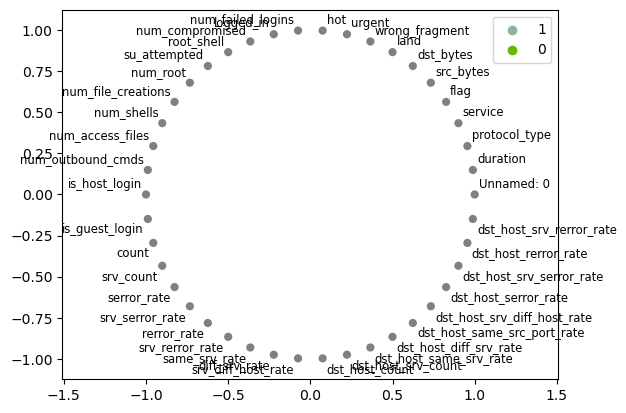

In [27]:
pd.plotting.radviz(dfPhase, 'class')

**As we can see the data is now balanced**

### Modeling :



In [24]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

X = X_smote
y = y_smote

X_train, a, y_train, b = train_test_split(X, y, test_size=0.3, random_state=101)  # a,b are dummy variables



In [25]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
    
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
# Model Building : our function to evaluate the model using cross validation and other metrics

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score



def model_eval(model,X,y):

    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    
    print(f"ROC AUC: {scores.mean():.4f} (+/- {scores.std():.4f})")

    model.fit(X, y)
    pred = model.predict(X_test)


    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(accuracy_score(y_test, pred))
    print(roc_auc_score(y_test, pred))
    

    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.show()

Now let's start testing some models

Epoch 1/20
589/589 [==============================] - 1s 1ms/step - loss: 0.2418 - val_loss: 0.0298
Epoch 2/20
589/589 [==============================] - 1s 1ms/step - loss: 0.0687 - val_loss: 0.0149
Epoch 3/20
589/589 [==============================] - 1s 1ms/step - loss: 0.0454 - val_loss: 0.0089
Epoch 4/20
589/589 [==============================] - 1s 1ms/step - loss: 0.0321 - val_loss: 0.0090
Epoch 5/20
589/589 [==============================] - 1s 1ms/step - loss: 0.0236 - val_loss: 0.0063
Epoch 6/20
589/589 [==============================] - 1s 1ms/step - loss: 0.0206 - val_loss: 0.0039
Epoch 7/20
589/589 [==============================] - 1s 1ms/step - loss: 0.0167 - val_loss: 0.0042
Epoch 8/20
589/589 [==============================] - 1s 1ms/step - loss: 0.0167 - val_loss: 0.0034
Epoch 9/20
589/589 [==============================] - 1s 1ms/step - loss: 0.0163 - val_loss: 0.0020
Epoch 10/20
589/589 [==============================] - 1s 1ms/step - loss: 0.0129 - val_loss: 0.0022

['loss']

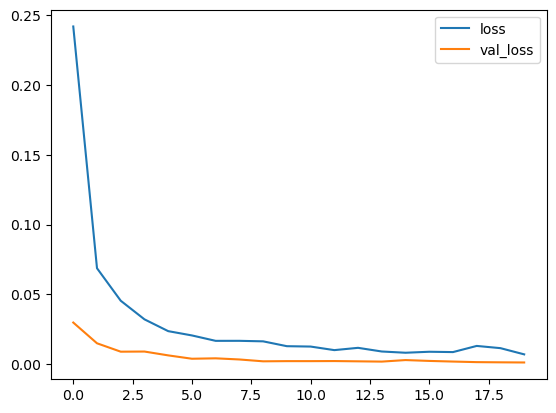

In [29]:
# Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

model.fit(x=X_train,y=y_train,epochs=20,validation_data=(X_test,y_test))

losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

model.metrics_names

In [30]:
# evaluating the model

predictions = model.predict(X_test)
predictions = (predictions > 0.07)              # here we added a threshold value, we sacrifice recall for precision

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

128/128 [==============================] - 0s 766us/step
[[  45    0]
 [   1 4034]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      1.00      1.00      4035

    accuracy                           1.00      4080
   macro avg       0.99      1.00      0.99      4080
weighted avg       1.00      1.00      1.00      4080



In [32]:
dfPhase2 = pd.read_csv("C:/Users/kasia/Downloads/project2/Phase2.csv")

### 2.1- Data Exploration & Preprocessing :



We will pass fast thorough the data exploration part since we already did it in the previous part.

In [33]:
print(dfPhase2.info())
kl.missingval_plot(dfPhase,figsize=(6,5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [34]:
print(dfPhase2.shape)

dfPhase2.drop_duplicates(subset=dfPhase2.columns[1:],inplace=True)

print(dfPhase2.shape)

(25192, 42)
(24995, 42)


In [35]:
# Target Encoding

from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

le = LabelEncoder()
encoder = TargetEncoder()


dfPhase2['class'] = le.fit_transform(dfPhase2['class'])


for col in dfPhase2.columns:
    if col != 'class' and not is_numeric_dtype(dfPhase2[col]):
        print(col)
        dfPhase2[col] = encoder.fit_transform(dfPhase2[col], dfPhase2['class'])


dfPhase2.head()

protocol_type
service
flag


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0.524659,0.717049,0.845423,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,0.830986,0.655126,0.845423,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,0.524659,0.046222,0.011414,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,0.524659,0.945146,0.845423,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,0.524659,0.945146,0.845423,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


**Looks like we spoted some duplicates in the data**

### 2.2- Modeling :


since the data is balanced this time, we won't need stratified sampling nor data augmentation. let's see how the model will perform on the data.

In [36]:
# Splitting the data into train and test

X = dfPhase2.drop('class',axis=1)
y = dfPhase2['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

# Scaling the data
scaler = StandardScaler()
    
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/20
547/547 [==============================] - 1s 2ms/step - loss: 0.2682 - val_loss: 0.1056
Epoch 2/20
547/547 [==============================] - 1s 1ms/step - loss: 0.1508 - val_loss: 0.0866
Epoch 3/20
547/547 [==============================] - 1s 1ms/step - loss: 0.1168 - val_loss: 0.0743
Epoch 4/20
547/547 [==============================] - 1s 1ms/step - loss: 0.1035 - val_loss: 0.0675
Epoch 5/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0873 - val_loss: 0.0616
Epoch 6/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0773 - val_loss: 0.0573
Epoch 7/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0786 - val_loss: 0.0544
Epoch 8/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0718 - val_loss: 0.0531
Epoch 9/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0642 - val_loss: 0.0516
Epoch 10/20
547/547 [==============================] - 1s 1ms/step - loss: 0.0588 - val_loss: 0.0513

<Axes: >

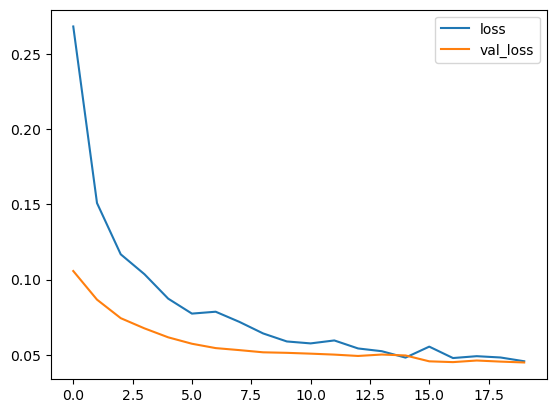

In [37]:
# Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(x=X_train,y=y_train,epochs=20,validation_data=(X_test,y_test))

losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [38]:
# evaluating the model

predictions = model.predict(X_test)
predictions = (predictions > 0.32)           # here we added a threshold value, we sacrifice a bit recall for precision, but it's higher than the one we used before     
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

235/235 [==============================] - 0s 748us/step
[[3355  148]
 [  17 3979]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3503
           1       0.96      1.00      0.98      3996

    accuracy                           0.98      7499
   macro avg       0.98      0.98      0.98      7499
weighted avg       0.98      0.98      0.98      7499

